Data Import

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dataviz24.csv')

In [3]:
data.head()

Country.Name Country.Code  \
0      Burundi          BDI   
1      Burundi          BDI   
2      Burundi          BDI   
3      Burundi          BDI   
4      Burundi          BDI   

                                      Indicator.Name  Indicator.Code  \
0  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
1  Adults (ages 15+) and children (0-14 years) li...     SH.HIV.TOTL   
2  Adults (ages 15+) and children (ages 0-14) new...  SH.HIV.INCD.TL   
3                  Adults (ages 15+) living with HIV     SH.DYN.AIDS   
4        Adults (ages 15-49) newly infected with HIV     SH.HIV.INCD   

       X1990       X1991       X1992       X1993       X1994       X1995  ...  \
0      74.13      76.396      77.095      77.785      75.554      76.888  ...   
1  120000.00  130000.000  150000.000  150000.000  160000.000  160000.000  ...   
2   28000.00   26000.000   24000.000   22000.000   19000.000   16000.000  ...   
3  110000.00  120000.000  130000.000  130000.000  130000.000  130000.000  ...   
4   20000.00   19000.000   17000.000   14000.000   11000.000    9600.000  ...   

       X2012      X2013      X2014      X2015      X2016      X2017  \
0     70.097     65.349     62.042     60.503     58.393     56.593   
1  89000.000  87000.000  85000.000  84000.000  83000.000  82000.000   
2   3500.000   3100.000   2900.000   2600.000   2200.000   1900.000   
3  73000.000  72000.000  72000.000  72000.000  72000.000  72000.000   
4   2000.000   1800.000   1700.000   1600.000   1400.000   1200.000   

       X2018      X2019     X2020      X2021  
0     56.272     54.856     54.36     53.621  
1  81000.000  81000.000  80000.00  80000.000  
2   1700.000   1600.000   1500.00   1600.000  
3  72000.000  72000.000  72000.00  72000.000  
4   1000.000   1000.000   1000.00   1000.000  

[5 rows x 36 columns]

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6318 entries, 0 to 6317
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country.Name    6318 non-null   object 
 1   Country.Code    6318 non-null   object 
 2   Indicator.Name  6318 non-null   object 
 3   Indicator.Code  6318 non-null   object 
 4   X1990           4222 non-null   float64
 5   X1991           4256 non-null   float64
 6   X1992           4329 non-null   float64
 7   X1993           4219 non-null   float64
 8   X1994           4266 non-null   float64
 9   X1995           4279 non-null   float64
 10  X1996           4274 non-null   float64
 11  X1997           4198 non-null   float64
 12  X1998           4269 non-null   float64
 13  X1999           4350 non-null   float64
 14  X2000           5273 non-null   float64
 15  X2001           5031 non-null   float64
 16  X2002           5022 non-null   float64
 17  X2003           4995 non-null   f

In [17]:
print(data['Indicator.Name'].unique())

['Adolescent fertility rate (births per 1,000 women ages 15-19)'
 'Adults (ages 15+) and children (0-14 years) living with HIV'
 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV'
 'Adults (ages 15+) living with HIV'
 'Adults (ages 15-49) newly infected with HIV'
 'Age dependency ratio (% of working-age population)'
 'Age dependency ratio, old' 'Age dependency ratio, young'
 'AIDS estimated deaths (UNAIDS estimates)'
 'Antiretroviral therapy coverage (% of people living with HIV)'
 'Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)'
 'Birth rate, crude (per 1,000 people)'
 'Births attended by skilled health staff (% of total)'
 'Capital health expenditure (% of GDP)'
 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'
 'Cause of death, by non-communicable diseases (% of total)'
 'Children (0-14) living with HIV'
 'Children (ages 0-14) newly infected with HIV'
 'Children orphaned by HIV/

## Objective 1: Investigate the burden of HIV infection.
### Develop visualizations that depict the prevalence and incidence rates of HIV infection among specific population groups over time highlighting geographic disparities and temporal trends in these African nations.

In [5]:
# Filter for HIV-related indicators
hiv_indicators = data[data['Indicator.Name'].str.contains('HIV')]

# Display unique indicator names to understand what we have
unique_indicators = hiv_indicators['Indicator.Name'].unique()
unique_indicators

array(['Adults (ages 15+) and children (0-14 years) living with HIV',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15+) living with HIV',
       'Adults (ages 15-49) newly infected with HIV',
       'Antiretroviral therapy coverage (% of people living with HIV)',
       'Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)',
       'Children (0-14) living with HIV',
       'Children (ages 0-14) newly infected with HIV',
       'Children orphaned by HIV/AIDS',
       'Incidence of HIV, ages 15-24 (per 1,000 uninfected population ages 15-24)',
       'Incidence of HIV, ages 15-49 (per 1,000 uninfected population ages 15-49)',
       'Incidence of HIV, ages 50+ (per 1,000 uninfected population ages 50+)',
       'Incidence of HIV, all (per 1,000 uninfected population)',
       'Prevalence of HIV, female (% ages 15-24)',
       'Prevalence of HIV, male (% ages 15-24)',
       'Prevalence of HIV, total (% of pop

In [6]:
# Melt the dataset
hiv_melted = pd.melt(hiv_indicators, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], 
                     var_name='Year', value_name='Value')

# Convert the 'Year' column to numeric
hiv_melted['Year'] = hiv_melted['Year'].str[1:].astype(int)

# Drop rows with missing values
hiv_melted.dropna(inplace=True)

hiv_melted.head()

Country.Name Country.Code  \
0      Burundi          BDI   
1      Burundi          BDI   
2      Burundi          BDI   
3      Burundi          BDI   
6      Burundi          BDI   

                                      Indicator.Name  Indicator.Code  Year  \
0  Adults (ages 15+) and children (0-14 years) li...     SH.HIV.TOTL  1990   
1  Adults (ages 15+) and children (ages 0-14) new...  SH.HIV.INCD.TL  1990   
2                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  1990   
3        Adults (ages 15-49) newly infected with HIV     SH.HIV.INCD  1990   
6                    Children (0-14) living with HIV     SH.HIV.0014  1990   

      Value  
0  120000.0  
1   28000.0  
2  110000.0  
3   20000.0  
6   13000.0

In [7]:
# Filter for HIV prevalence indicators
prevalence_indicators = data[data['Indicator.Name'].isin([
    'Prevalence of HIV, total (% of population ages 15-49)'
])]

# Display the filtered data to verify
prevalence_indicators.head()

Country.Name Country.Code  \
187                    Burundi          BDI   
421   Central African Republic          CAF   
655           Congo, Dem. Rep.          COD   
889                Congo, Rep.          COG   
1123                  Djibouti          DJI   

                                         Indicator.Name  Indicator.Code  \
187   Prevalence of HIV, total (% of population ages...  SH.DYN.AIDS.ZS   
421   Prevalence of HIV, total (% of population ages...  SH.DYN.AIDS.ZS   
655   Prevalence of HIV, total (% of population ages...  SH.DYN.AIDS.ZS   
889   Prevalence of HIV, total (% of population ages...  SH.DYN.AIDS.ZS   
1123  Prevalence of HIV, total (% of population ages...  SH.DYN.AIDS.ZS   

      X1990  X1991  X1992  X1993  X1994  X1995  ...  X2012  X2013  X2014  \
187     4.2    4.7    5.0    5.1    5.1    4.9  ...    1.5    1.4    1.3   
421     4.0    4.8    5.6    6.3    7.0    7.5  ...    4.5    4.2    4.0   
655     1.8    1.9    2.0    2.0    2.1    2.1  ...    1.1    1.0    1.0   
889     4.3    4.5    4.7    4.7    4.7    4.7  ...    3.5    3.5    3.5   
1123    0.1    0.2    0.3    0.5    0.8    1.1  ...    1.6    1.4    1.3   

      X2015  X2016  X2017  X2018  X2019  X2020  X2021  
187     1.3    1.2    1.2    1.1    1.0    1.0    0.9  
421     3.8    3.6    3.4    3.2    3.1    2.9    2.7  
655     0.9    0.9    0.9    0.8    0.8    0.8    0.7  
889     3.5    3.6    3.6    3.6    3.7    3.8    3.8  
1123    1.2    1.1    1.0    0.9    0.9    0.8    0.7  

[5 rows x 36 columns]

In [8]:
# Melt the dataset
prevalence_melted = pd.melt(prevalence_indicators, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], 
                            var_name='Year', value_name='Value')

# Convert the 'Year' column to numeric
prevalence_melted['Year'] = prevalence_melted['Year'].str[1:].astype(int)

# Drop rows with missing values
prevalence_melted.dropna(inplace=True)

prevalence_melted.head()


Country.Name Country.Code  \
0                   Burundi          BDI   
1  Central African Republic          CAF   
2          Congo, Dem. Rep.          COD   
3               Congo, Rep.          COG   
4                  Djibouti          DJI   

                                      Indicator.Name  Indicator.Code  Year  \
0  Prevalence of HIV, total (% of population ages...  SH.DYN.AIDS.ZS  1990   
1  Prevalence of HIV, total (% of population ages...  SH.DYN.AIDS.ZS  1990   
2  Prevalence of HIV, total (% of population ages...  SH.DYN.AIDS.ZS  1990   
3  Prevalence of HIV, total (% of population ages...  SH.DYN.AIDS.ZS  1990   
4  Prevalence of HIV, total (% of population ages...  SH.DYN.AIDS.ZS  1990   

   Value  
0    4.2  
1    4.0  
2    1.8  
3    4.3  
4    0.1

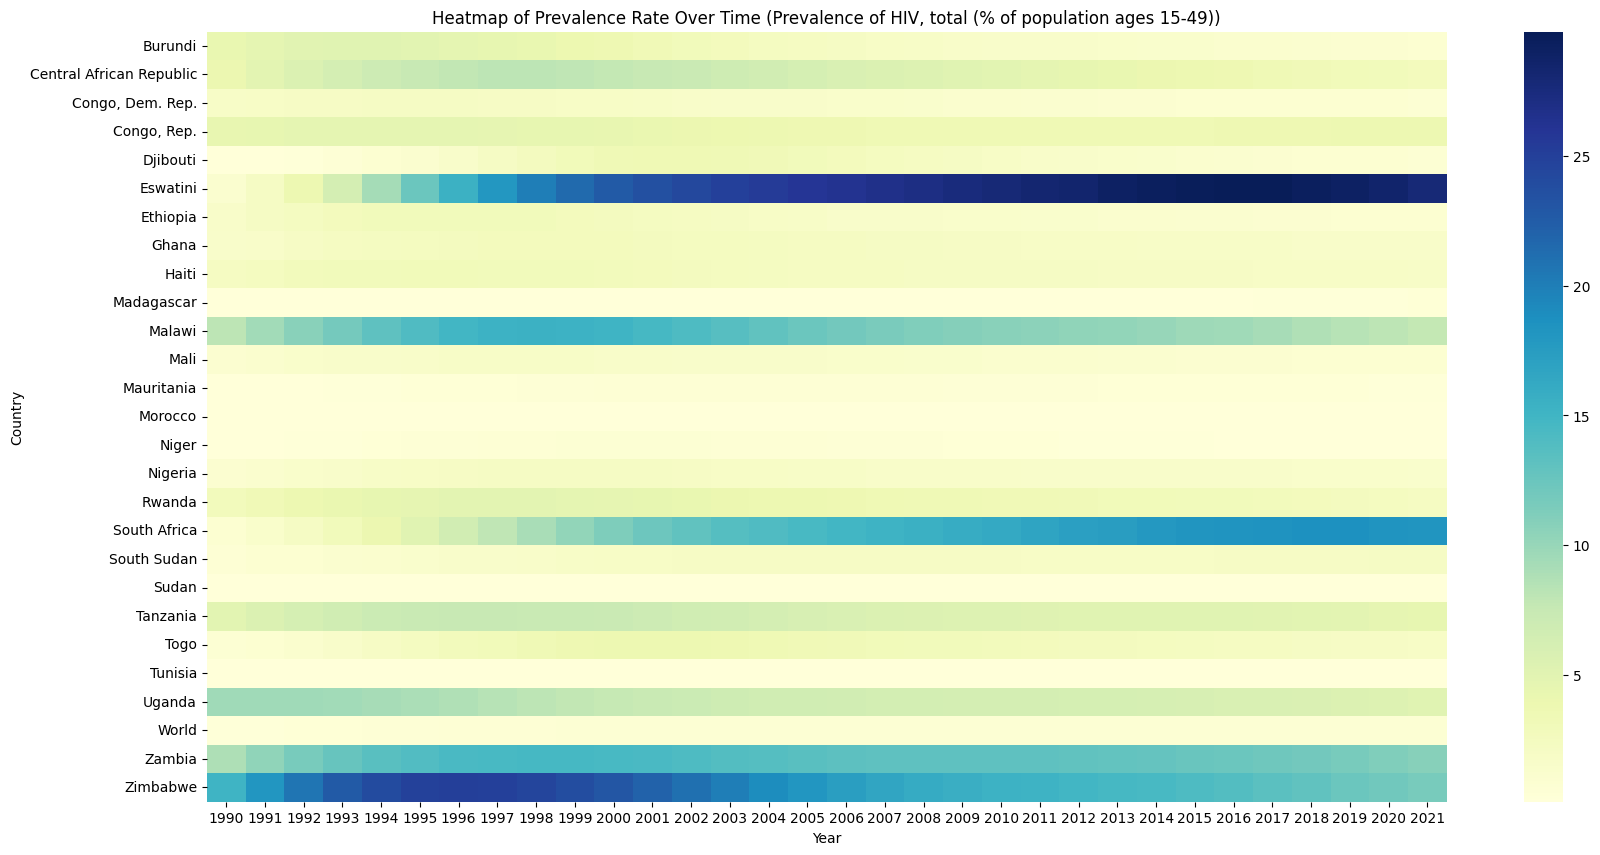

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmaps for Prevalence Rate Over Time for Different Population Groups without Annotations
for indicator in prevalence_melted['Indicator.Name'].unique():
    plt.figure(figsize=(20, 10))
    heatmap_data = prevalence_melted[prevalence_melted['Indicator.Name'] == indicator].pivot(index='Country.Name', columns='Year', values='Value')
    sns.heatmap(heatmap_data, cmap="YlGnBu")
    plt.title(f'Heatmap of Prevalence Rate Over Time ({indicator})')
    plt.xlabel('Year')
    plt.ylabel('Country')
    plt.show()

In [11]:
# Filter for HIV incidence indicators
incidence_indicators = data[data['Indicator.Name'].isin([
    'Incidence of HIV, all (per 1,000 uninfected population)'
])]

# Display the filtered data to verify
incidence_indicators.head()

Country.Name Country.Code  \
55                    Burundi          BDI   
289  Central African Republic          CAF   
523          Congo, Dem. Rep.          COD   
757               Congo, Rep.          COG   
991                  Djibouti          DJI   

                                        Indicator.Name     Indicator.Code  \
55   Incidence of HIV, all (per 1,000 uninfected po...  SH.HIV.INCD.TL.P3   
289  Incidence of HIV, all (per 1,000 uninfected po...  SH.HIV.INCD.TL.P3   
523  Incidence of HIV, all (per 1,000 uninfected po...  SH.HIV.INCD.TL.P3   
757  Incidence of HIV, all (per 1,000 uninfected po...  SH.HIV.INCD.TL.P3   
991  Incidence of HIV, all (per 1,000 uninfected po...  SH.HIV.INCD.TL.P3   

     X1990  X1991  X1992  X1993  X1994  X1995  ...  X2012  X2013  X2014  \
55    5.27   4.88   4.45   3.89   3.31   2.87  ...   0.40   0.34   0.31   
289   5.81   6.46   6.87   7.07   7.13   6.73  ...   1.59   1.53   1.33   
523   1.72   1.69   1.62   1.58   1.52   1.43  ...   0.46   0.42   0.37   
757   4.19   3.81   3.56   3.44   3.19   3.03  ...   2.04   2.08   2.06   
991   0.24   0.42   0.74   1.16   1.60   2.11  ...   0.36   0.29   0.25   

     X2015  X2016  X2017  X2018  X2019  X2020  X2021  
55    0.27   0.22   0.19   0.16   0.14   0.13   0.14  
289   1.12   0.99   0.95   0.84   0.72   0.65   0.58  
523   0.35   0.33   0.31   0.28   0.25   0.22   0.18  
757   2.04   2.21   2.40   2.41   2.52   2.68   2.39  
991   0.22   0.20   0.19   0.17   0.15   0.14   0.13  

[5 rows x 36 columns]

In [12]:
# Melt the dataset
incidence_melted = pd.melt(incidence_indicators, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], 
                            var_name='Year', value_name='Value')

# Convert the 'Year' column to numeric
incidence_melted['Year'] = incidence_melted['Year'].str[1:].astype(int)

# Drop rows with missing values
incidence_melted.dropna(inplace=True)

incidence_melted.head()

Country.Name Country.Code  \
0                   Burundi          BDI   
1  Central African Republic          CAF   
2          Congo, Dem. Rep.          COD   
3               Congo, Rep.          COG   
4                  Djibouti          DJI   

                                      Indicator.Name     Indicator.Code  Year  \
0  Incidence of HIV, all (per 1,000 uninfected po...  SH.HIV.INCD.TL.P3  1990   
1  Incidence of HIV, all (per 1,000 uninfected po...  SH.HIV.INCD.TL.P3  1990   
2  Incidence of HIV, all (per 1,000 uninfected po...  SH.HIV.INCD.TL.P3  1990   
3  Incidence of HIV, all (per 1,000 uninfected po...  SH.HIV.INCD.TL.P3  1990   
4  Incidence of HIV, all (per 1,000 uninfected po...  SH.HIV.INCD.TL.P3  1990   

   Value  
0   5.27  
1   5.81  
2   1.72  
3   4.19  
4   0.24

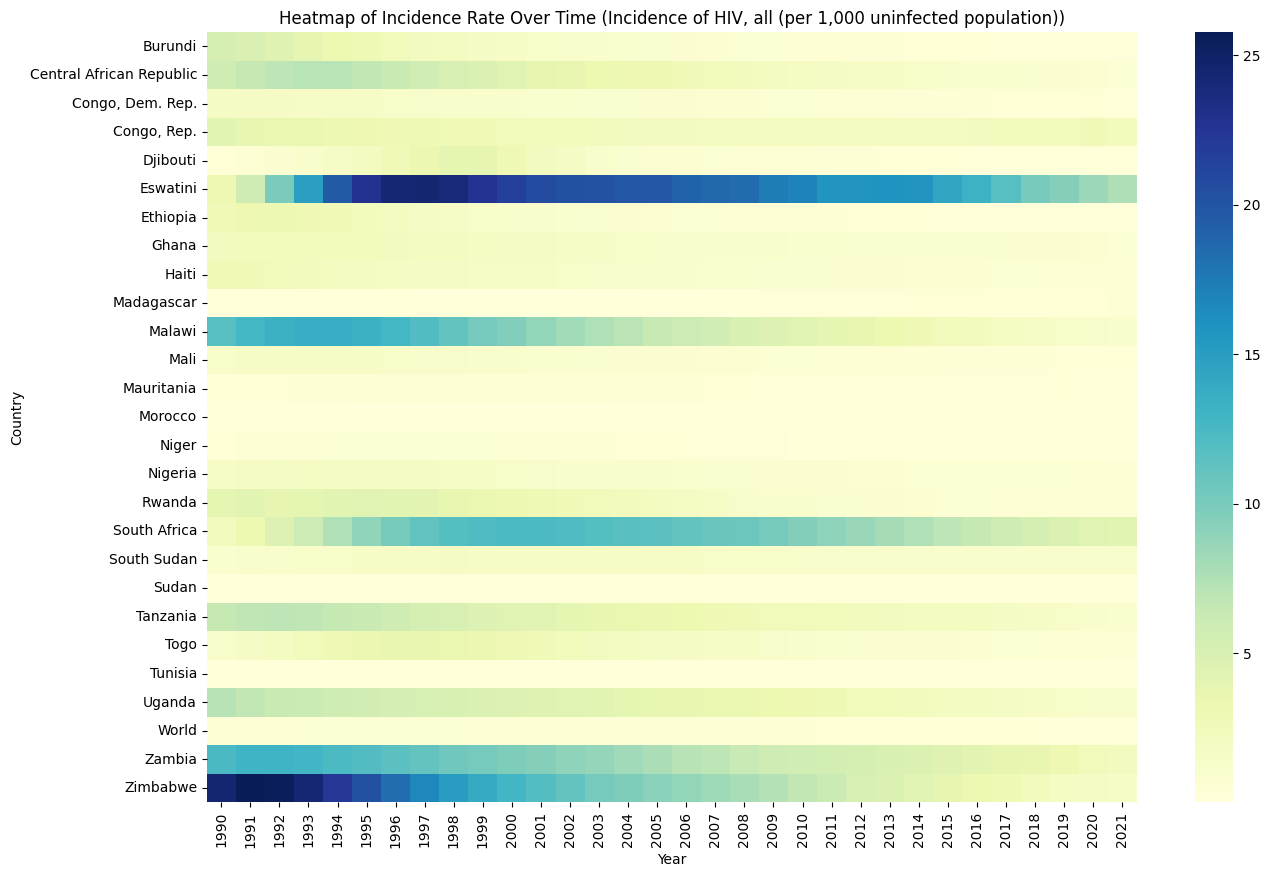

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmaps for Prevalence Rate Over Time for Different Population Groups without Annotations
for indicator in incidence_melted['Indicator.Name'].unique():
    plt.figure(figsize=(15, 10))
    heatmap_data = incidence_melted[incidence_melted['Indicator.Name'] == indicator].pivot(index='Country.Name', columns='Year', values='Value')
    sns.heatmap(heatmap_data, cmap="YlGnBu")
    plt.title(f'Heatmap of Incidence Rate Over Time ({indicator})')
    plt.xlabel('Year')
    plt.ylabel('Country')
    plt.show()

## Objective 2: Associate HIV infection with social and environmental factors.
### Develop visualizations to illustrate the relationship between HIV infection rates and social/ environmental factors such as poverty, literacy, etc., thereby identifying potential areas for targeted intervention and policy improvement in these African nations.

In [19]:
socio_economic = [
    'Poverty headcount ratio at national poverty line (% of population)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Literacy rate, youth total (% of people ages 15-24)',
    'Hospital beds (per 1,000 people)',
    'Physicians (per 1,000 people)',
    'Population, total',
    'Population, female (% of total population)',
    'Population, male (% of total population)',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'School enrollment, primary (% gross)',
    'School enrollment, secondary (% gross)',
    'School enrollment, tertiary (% gross)',
    'Contraceptive prevalence, any method (% of all women ages 15-49)',
    'Contraceptive prevalence, any modern method (% of all women ages 15-49)',
    'Condom use at last high-risk sex, adult female (% ages 15-49)',
    'Condom use at last high-risk sex, adult male (% ages 15-49)',
    'Antiretroviral therapy coverage (% of people living with HIV)',
    'People with basic handwashing facilities including soap and water (% of population)',
    'Urban population (% of total population)',
    'Rural population (% of total population)'
]

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
data = pd.read_csv('dataviz24.csv')
data.head()


Country.Name Country.Code  \
0      Burundi          BDI   
1      Burundi          BDI   
2      Burundi          BDI   
3      Burundi          BDI   
4      Burundi          BDI   

                                      Indicator.Name  Indicator.Code  \
0  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
1  Adults (ages 15+) and children (0-14 years) li...     SH.HIV.TOTL   
2  Adults (ages 15+) and children (ages 0-14) new...  SH.HIV.INCD.TL   
3                  Adults (ages 15+) living with HIV     SH.DYN.AIDS   
4        Adults (ages 15-49) newly infected with HIV     SH.HIV.INCD   

       X1990       X1991       X1992       X1993       X1994       X1995  ...  \
0      74.13      76.396      77.095      77.785      75.554      76.888  ...   
1  120000.00  130000.000  150000.000  150000.000  160000.000  160000.000  ...   
2   28000.00   26000.000   24000.000   22000.000   19000.000   16000.000  ...   
3  110000.00  120000.000  130000.000  130000.000  130000.000  130000.000  ...   
4   20000.00   19000.000   17000.000   14000.000   11000.000    9600.000  ...   

       X2012      X2013      X2014      X2015      X2016      X2017  \
0     70.097     65.349     62.042     60.503     58.393     56.593   
1  89000.000  87000.000  85000.000  84000.000  83000.000  82000.000   
2   3500.000   3100.000   2900.000   2600.000   2200.000   1900.000   
3  73000.000  72000.000  72000.000  72000.000  72000.000  72000.000   
4   2000.000   1800.000   1700.000   1600.000   1400.000   1200.000   

       X2018      X2019     X2020      X2021  
0     56.272     54.856     54.36     53.621  
1  81000.000  81000.000  80000.00  80000.000  
2   1700.000   1600.000   1500.00   1600.000  
3  72000.000  72000.000  72000.00  72000.000  
4   1000.000   1000.000   1000.00   1000.000  

[5 rows x 36 columns]

In [24]:
# socio_economic_indicators = [
#     'Poverty headcount ratio at national poverty line (% of population)',
#     'Literacy rate, adult total (% of people ages 15 and above)',
#     # Add other indicators as needed
# ]
socio_economic_indicators = [
    'Poverty headcount ratio at national poverty line (% of population)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Literacy rate, youth total (% of people ages 15-24)',
    'Hospital beds (per 1,000 people)',
    'Physicians (per 1,000 people)',
    'Population, total',
    'Population, female (% of total population)',
    'Population, male (% of total population)',
    'Population growth (annual %)',
    'Life expectancy at birth, total (years)',
    'School enrollment, primary (% gross)',
    'School enrollment, secondary (% gross)',
    'School enrollment, tertiary (% gross)',
    'Contraceptive prevalence, any method (% of all women ages 15-49)',
    'Contraceptive prevalence, any modern method (% of all women ages 15-49)',
    'Condom use at last high-risk sex, adult female (% ages 15-49)',
    'Condom use at last high-risk sex, adult male (% ages 15-49)',
    'Antiretroviral therapy coverage (% of people living with HIV)',
    'People with basic handwashing facilities including soap and water (% of population)',
    'Urban population (% of total population)',
    'Rural population (% of total population)'
]

In [25]:
hiv_indicators = data[data['Indicator.Name'].str.contains('HIV')]
socio_economic_data = data[data['Indicator.Name'].isin(socio_economic_indicators)]

hiv_melted = pd.melt(hiv_indicators, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], var_name='Year', value_name='Value')
socio_melted = pd.melt(socio_economic_data, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], var_name='Year', value_name='Value')

hiv_melted['Year'] = hiv_melted['Year'].str[1:].astype(int)
socio_melted['Year'] = socio_melted['Year'].str[1:].astype(int)

hiv_melted.dropna(inplace=True)
socio_melted.dropna(inplace=True)


In [34]:
socio_melted.head()

Country.Name Country.Code  \
6       Burundi          BDI   
7       Burundi          BDI   
8       Burundi          BDI   
10      Burundi          BDI   
11      Burundi          BDI   

                                       Indicator.Name     Indicator.Code  \
6             Life expectancy at birth, total (years)     SP.DYN.LE00.IN   
7   Literacy rate, adult total (% of people ages 1...     SE.ADT.LITR.ZS   
8   Literacy rate, youth total (% of people ages 1...  SE.ADT.1524.LT.ZS   
10                      Physicians (per 1,000 people)     SH.MED.PHYS.ZS   
11                       Population growth (annual %)        SP.POP.GROW   

    Year      Value  
6   1990  44.860000  
7   1990  37.384720  
8   1990  53.555210  
10  1990   0.058000  
11  1990   2.028089

In [33]:
hiv_melted.head()

Country.Name Country.Code  \
0      Burundi          BDI   
1      Burundi          BDI   
2      Burundi          BDI   
3      Burundi          BDI   
6      Burundi          BDI   

                                      Indicator.Name  Indicator.Code  Year  \
0  Adults (ages 15+) and children (0-14 years) li...     SH.HIV.TOTL  1990   
1  Adults (ages 15+) and children (ages 0-14) new...  SH.HIV.INCD.TL  1990   
2                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  1990   
3        Adults (ages 15-49) newly infected with HIV     SH.HIV.INCD  1990   
6                    Children (0-14) living with HIV     SH.HIV.0014  1990   

      Value  
0  120000.0  
1   28000.0  
2  110000.0  
3   20000.0  
6   13000.0

In [35]:
merged_data = pd.merge(hiv_melted, socio_melted, on=['Country.Name', 'Country.Code', 'Year'], suffixes=('_HIV', '_Socio'))
merged_data.head()

Country.Name Country.Code  \
0      Burundi          BDI   
1      Burundi          BDI   
2      Burundi          BDI   
3      Burundi          BDI   
4      Burundi          BDI   

                                  Indicator.Name_HIV Indicator.Code_HIV  Year  \
0  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL  1990   
1  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL  1990   
2  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL  1990   
3  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL  1990   
4  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL  1990   

   Value_HIV                               Indicator.Name_Socio  \
0   120000.0            Life expectancy at birth, total (years)   
1   120000.0  Literacy rate, adult total (% of people ages 1...   
2   120000.0  Literacy rate, youth total (% of people ages 1...   
3   120000.0                      Physicians (per 1,000 people)   
4   120000.0                       Population growth (annual %)   

  Indicator.Code_Socio  Value_Socio  
0       SP.DYN.LE00.IN    44.860000  
1       SE.ADT.LITR.ZS    37.384720  
2    SE.ADT.1524.LT.ZS    53.555210  
3       SH.MED.PHYS.ZS     0.058000  
4          SP.POP.GROW     2.028089

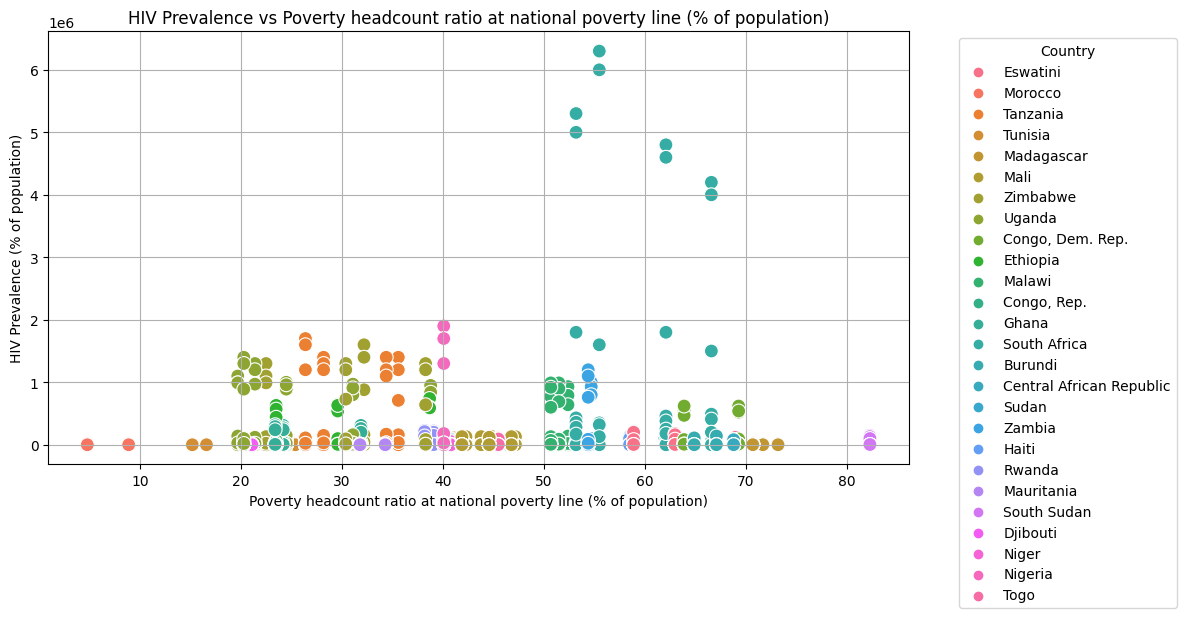

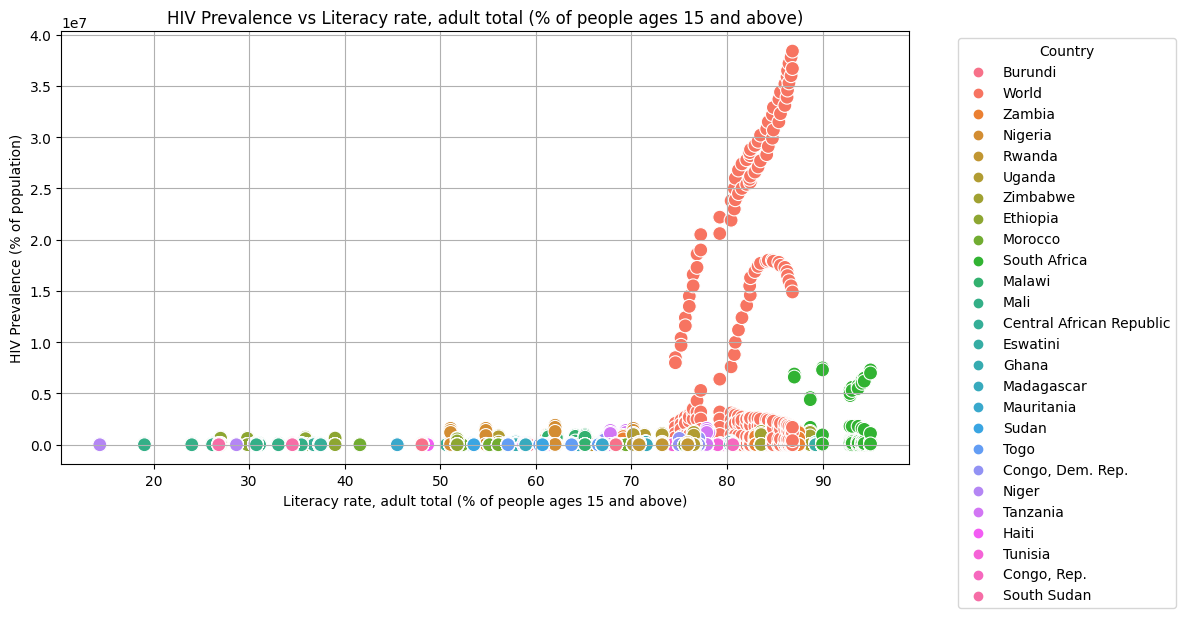

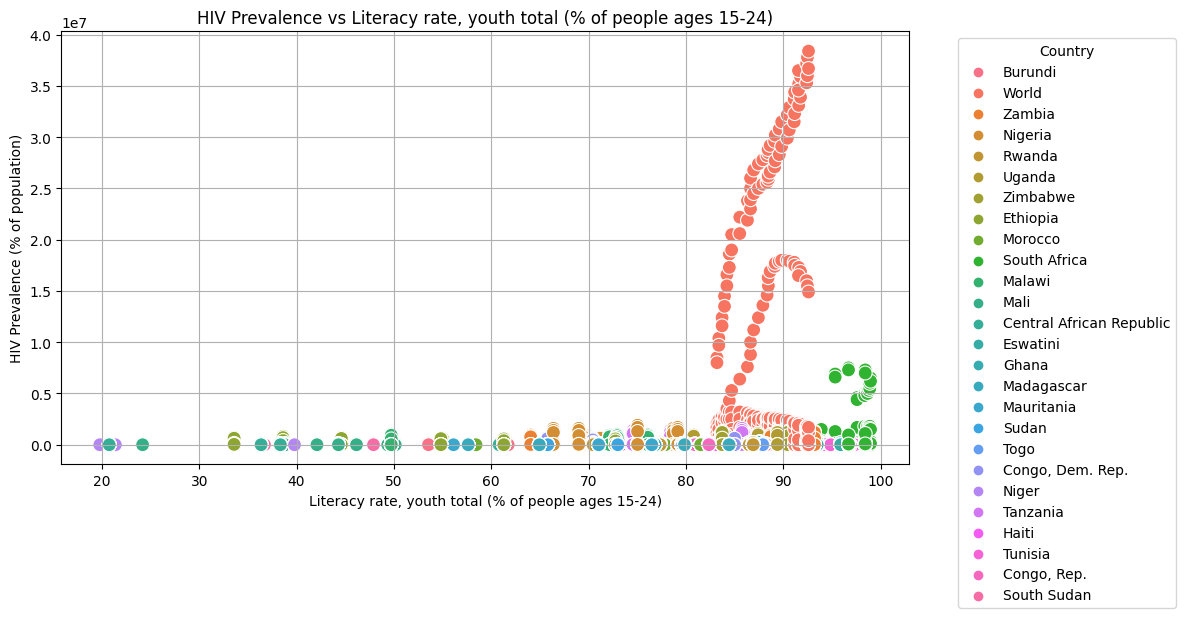

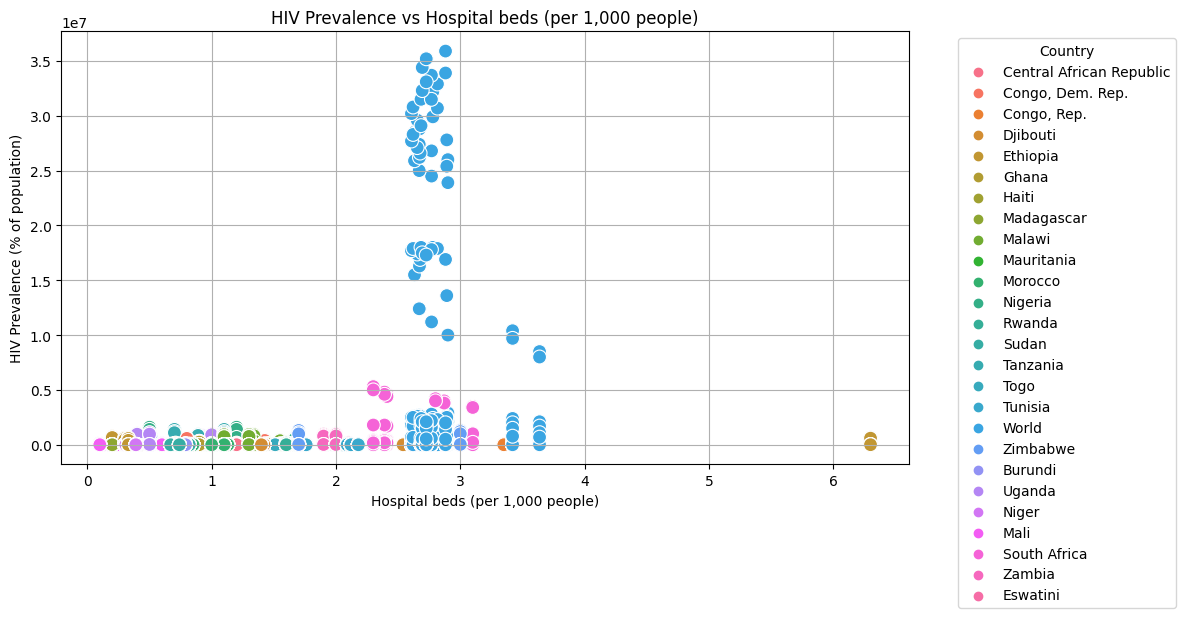

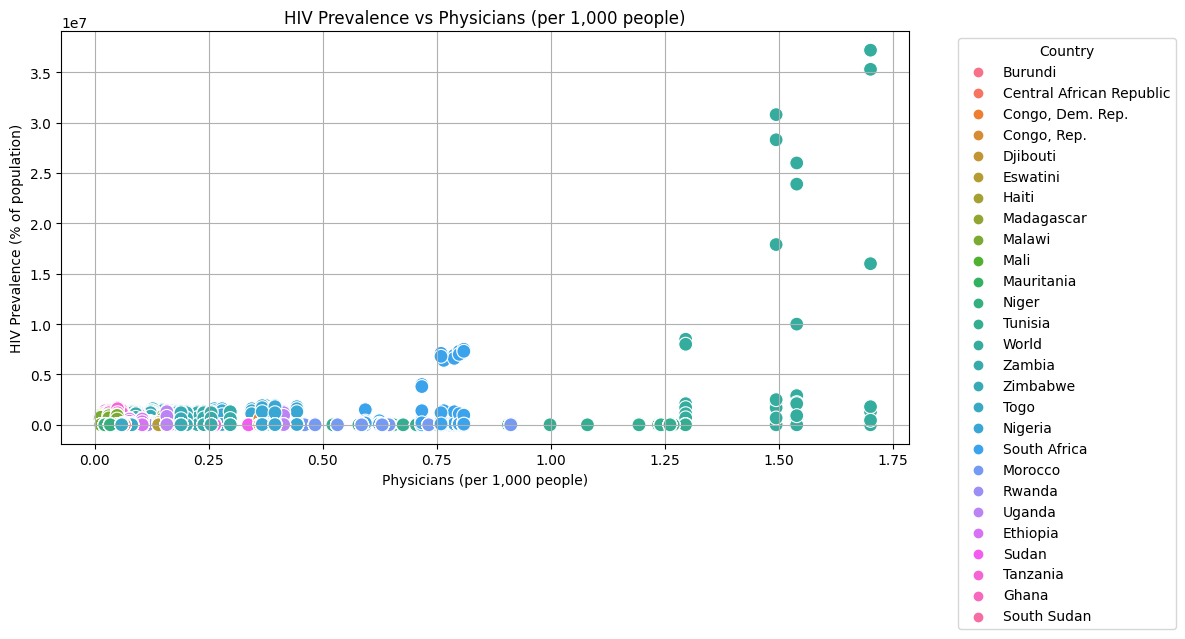

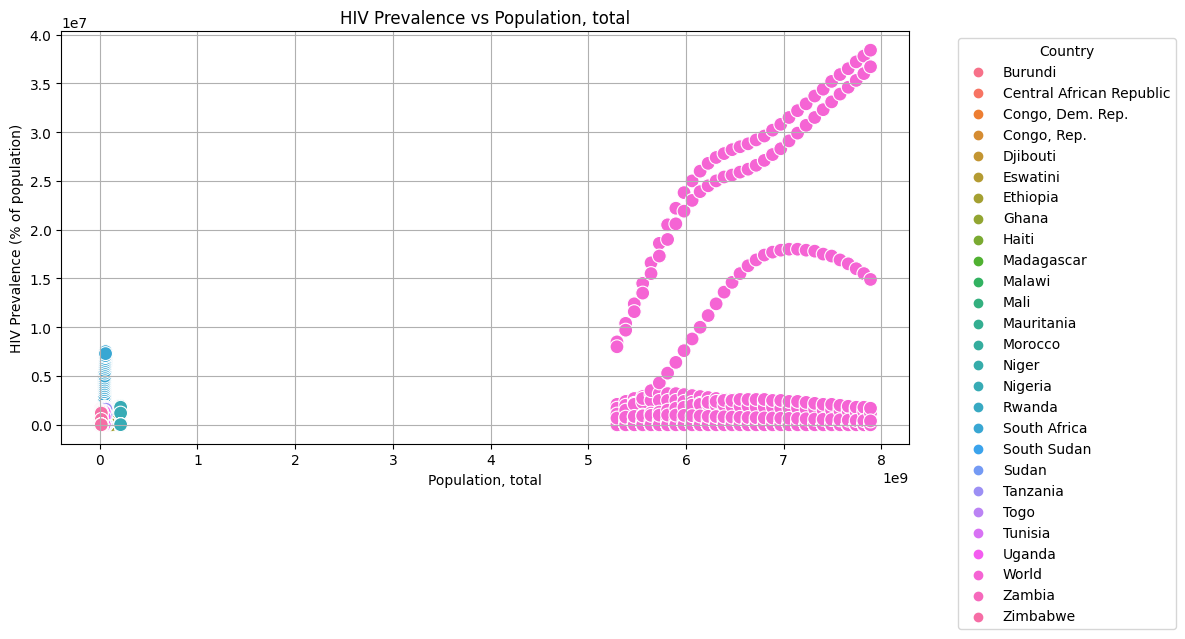

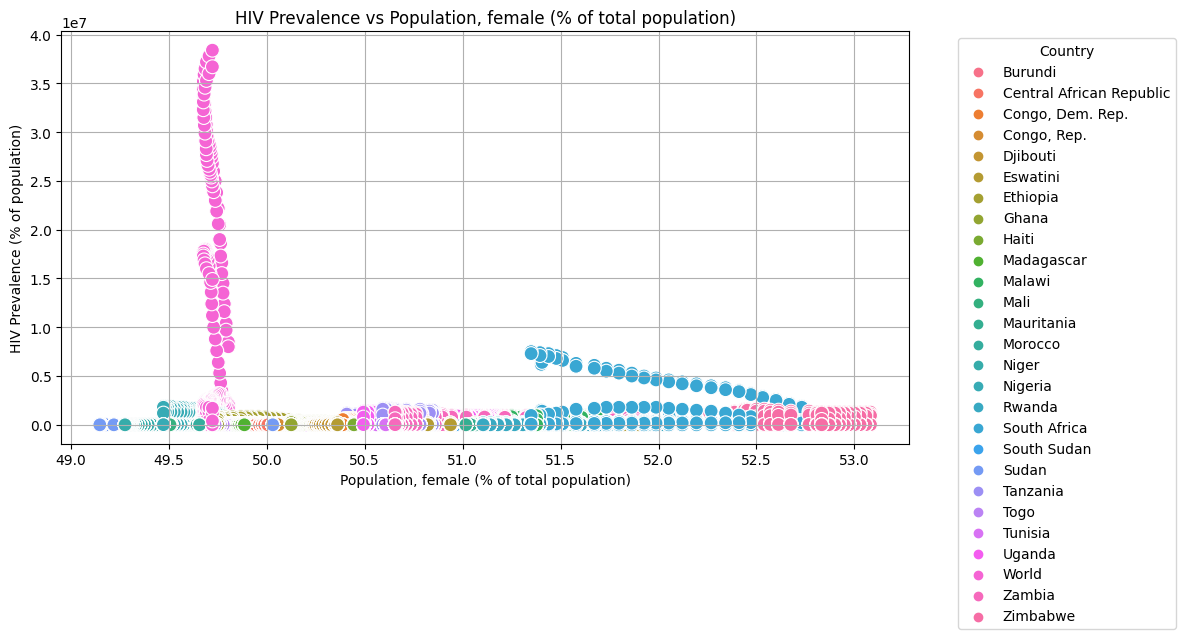

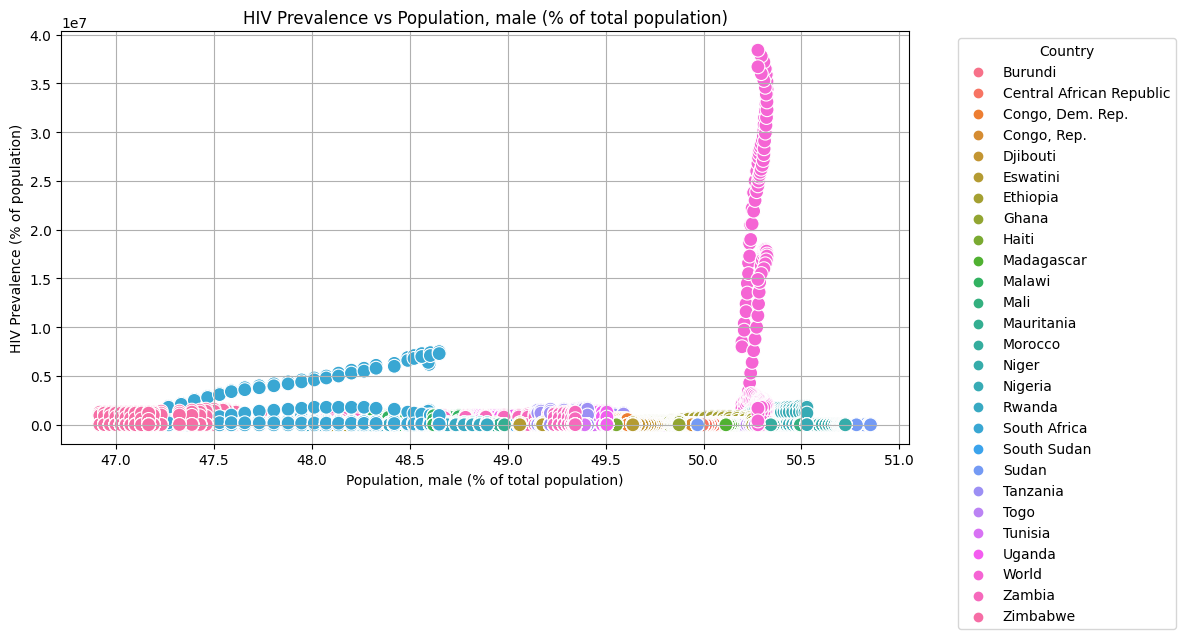

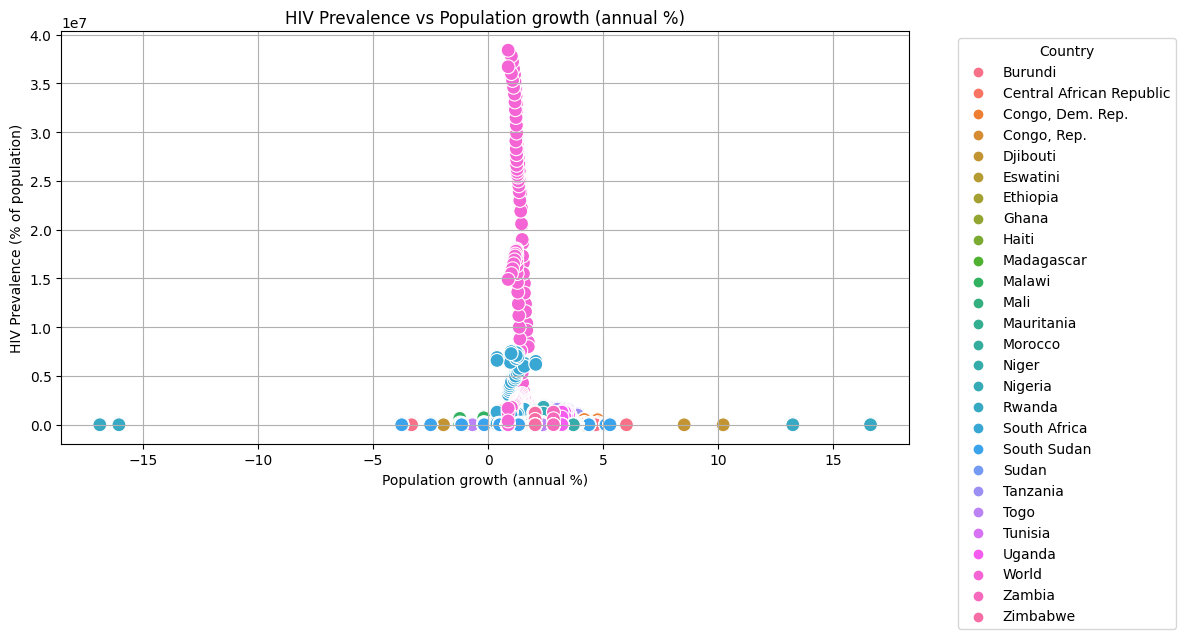

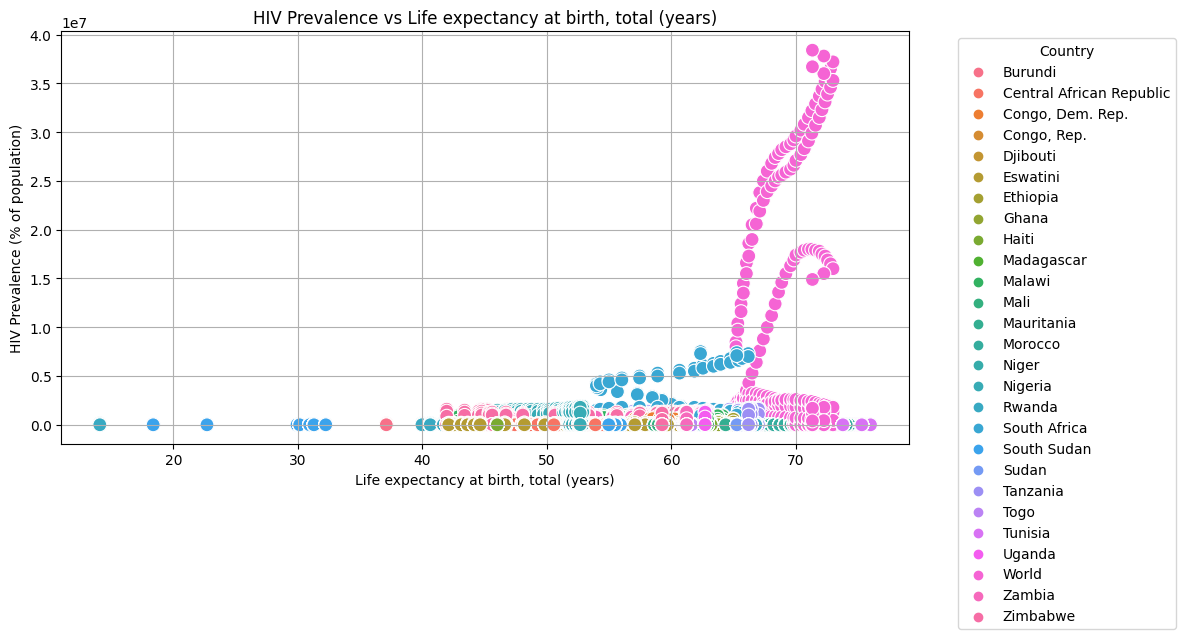

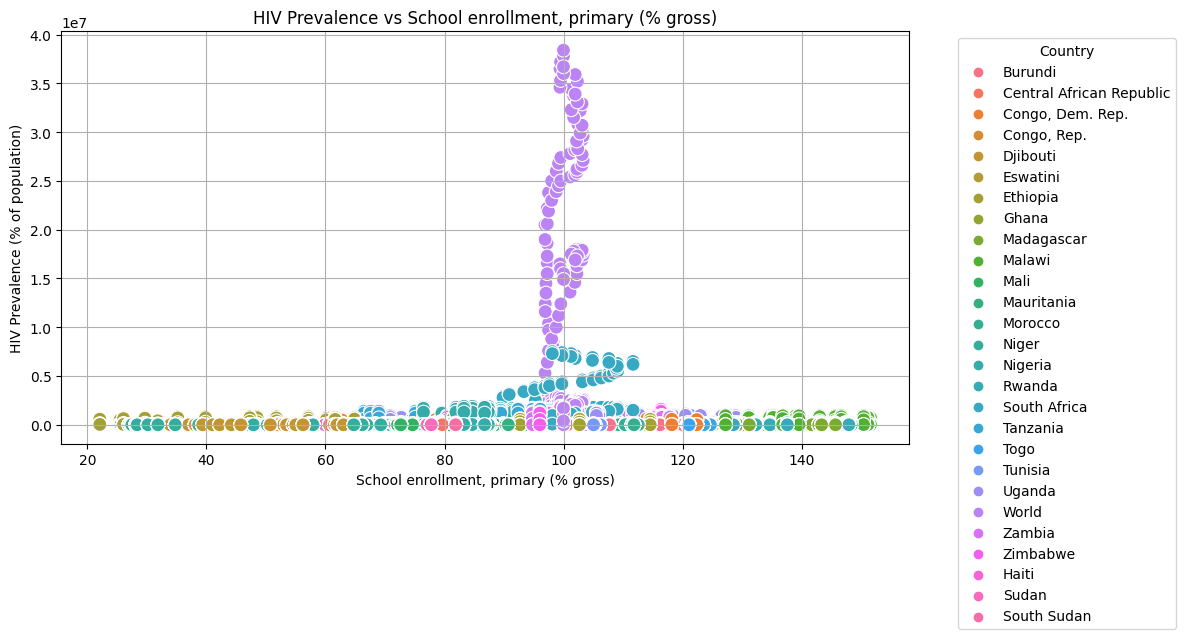

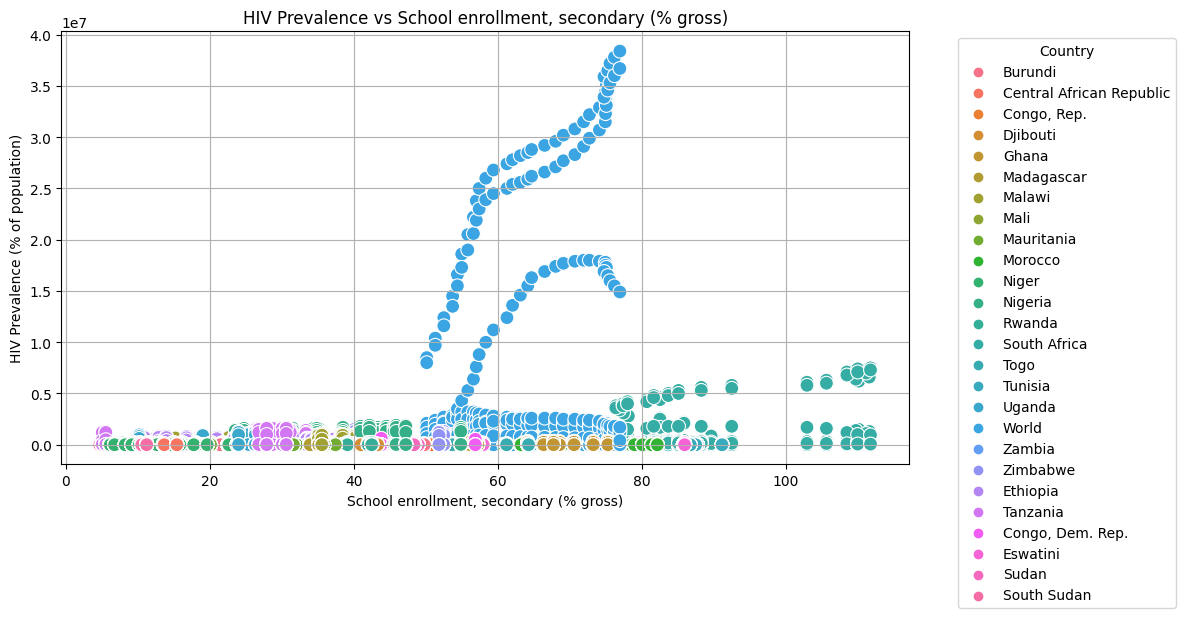

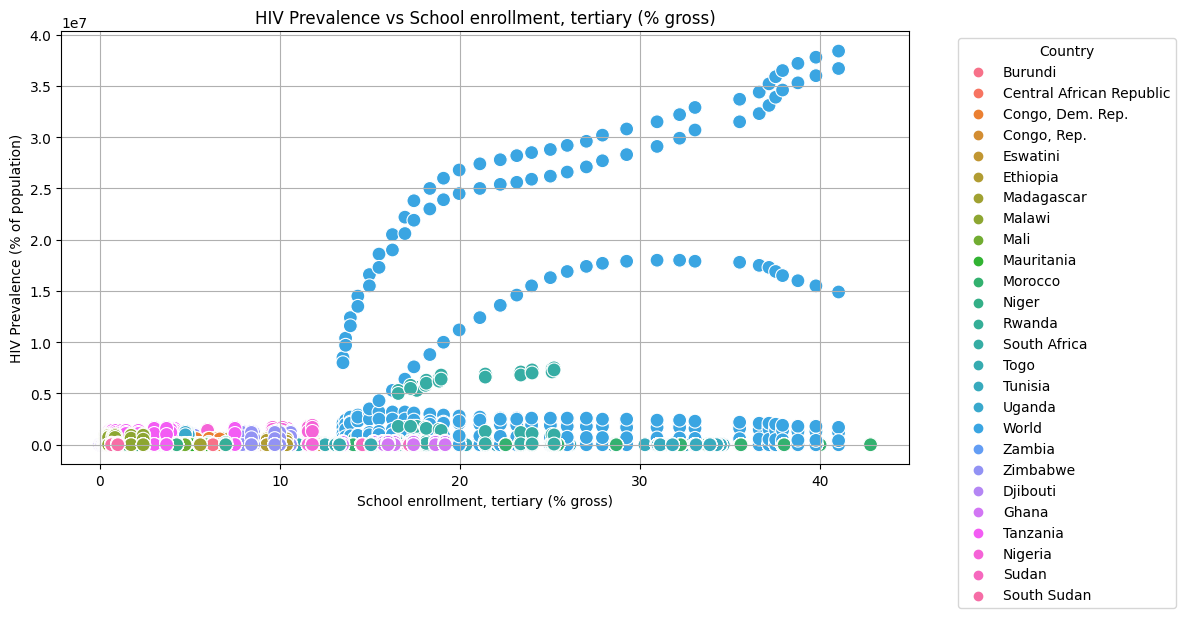

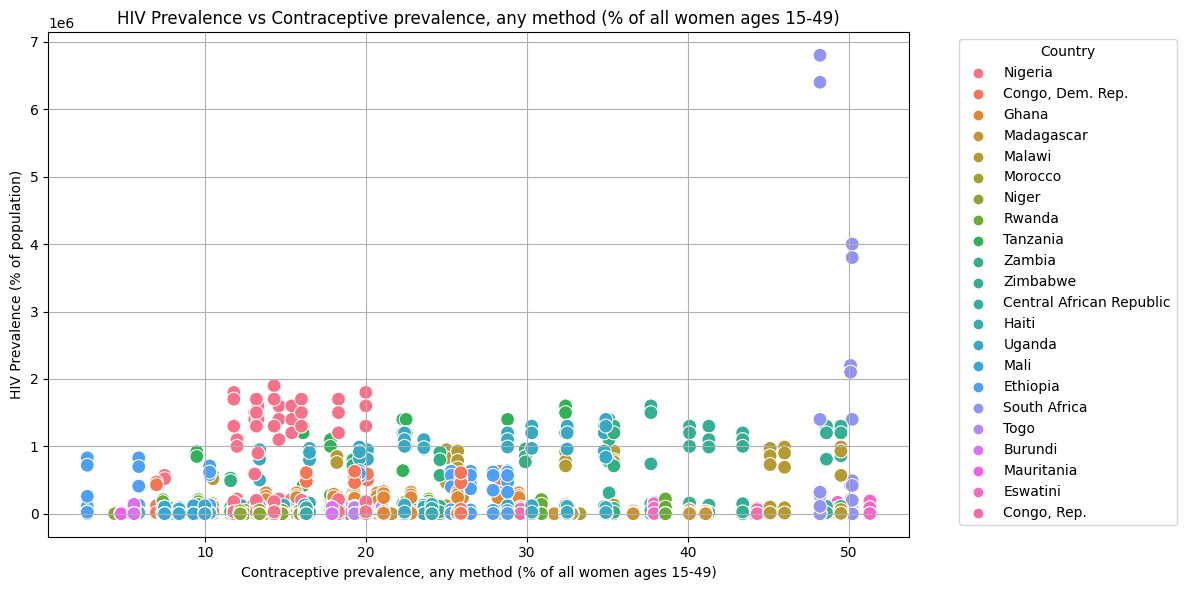

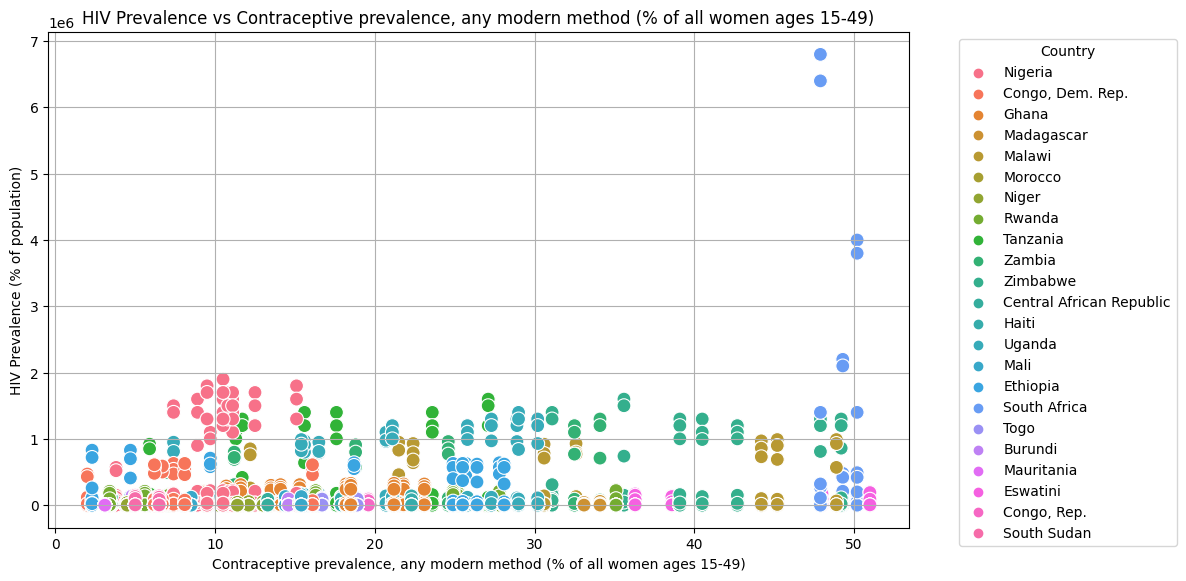

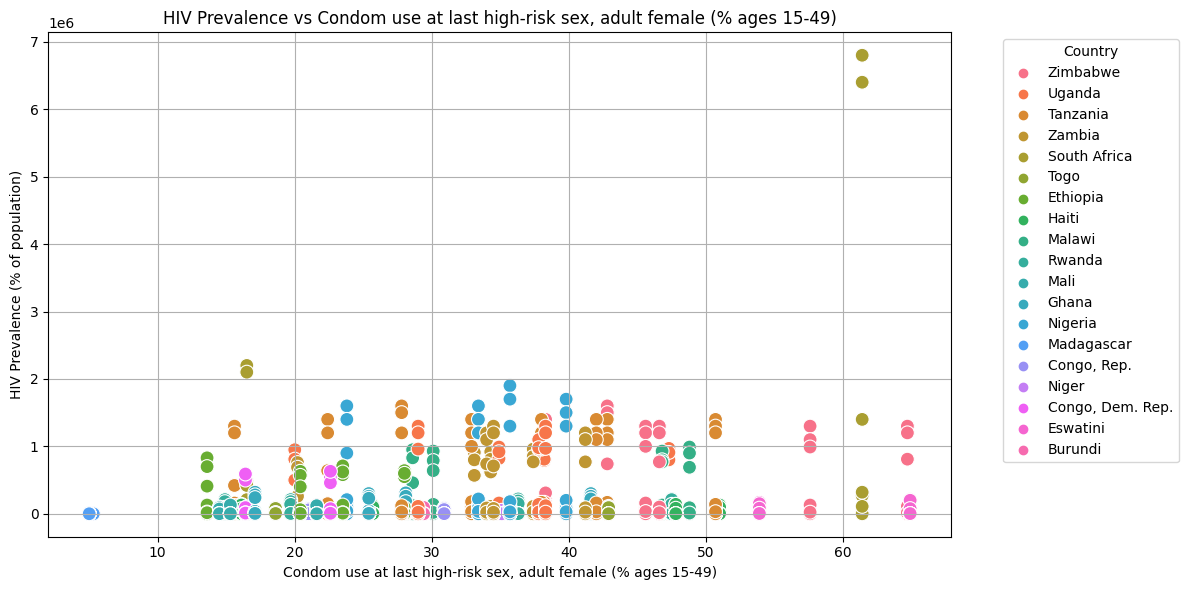

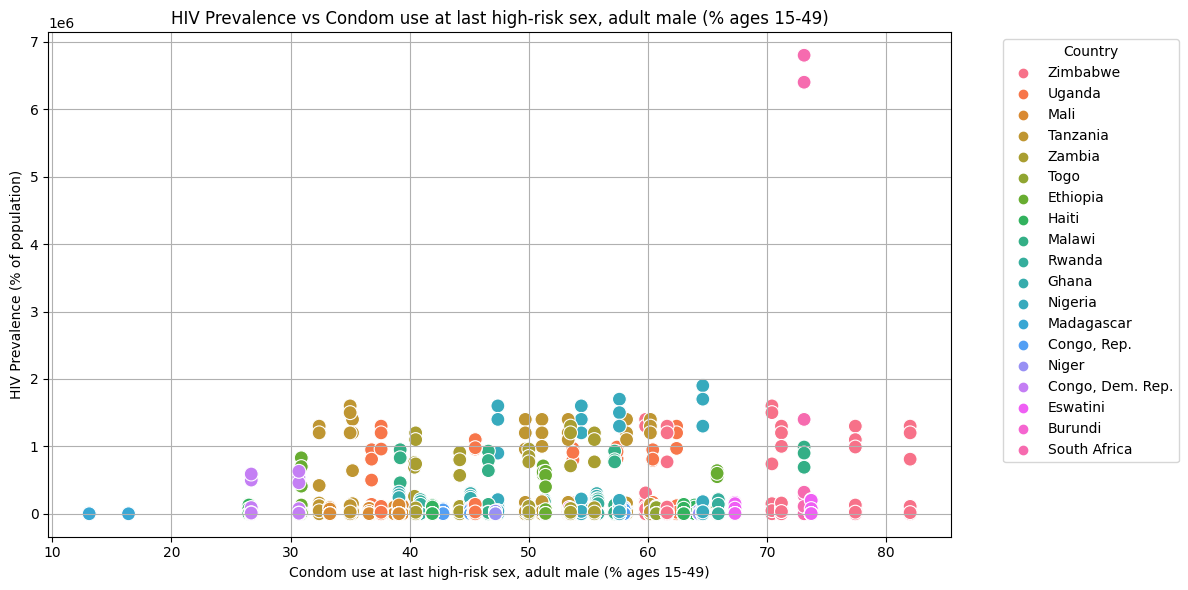

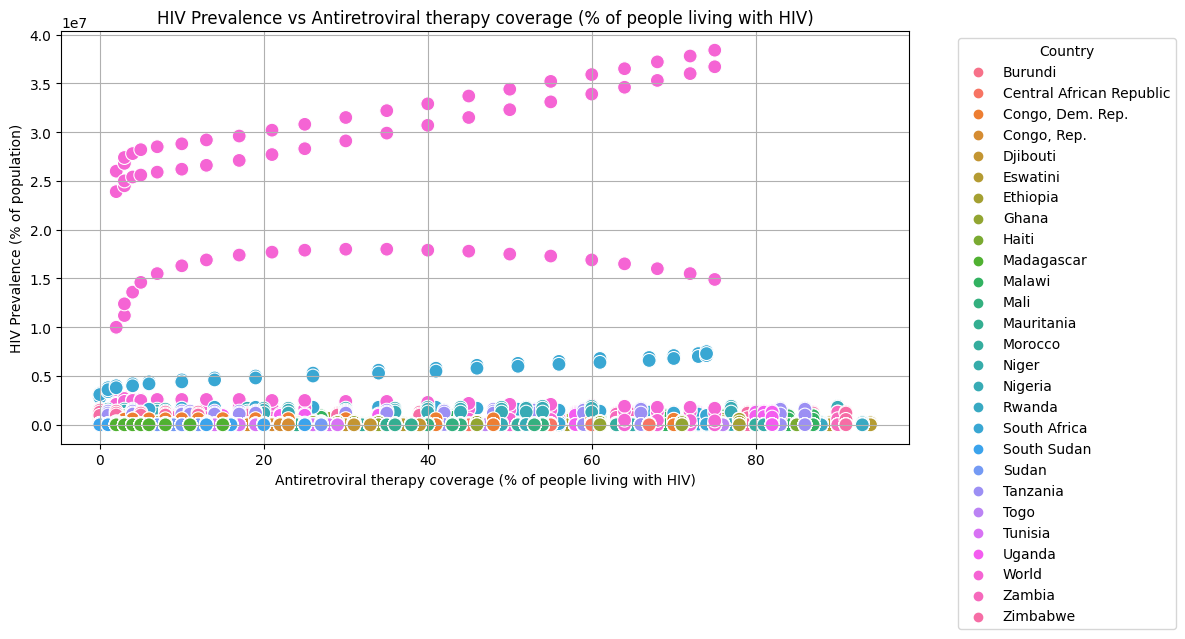

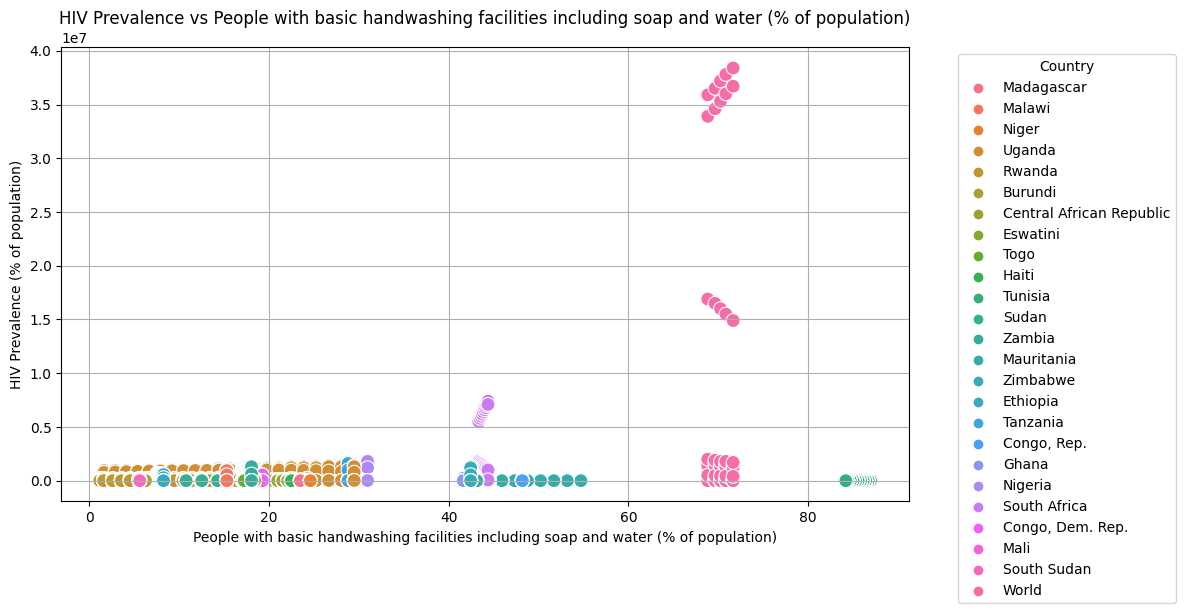

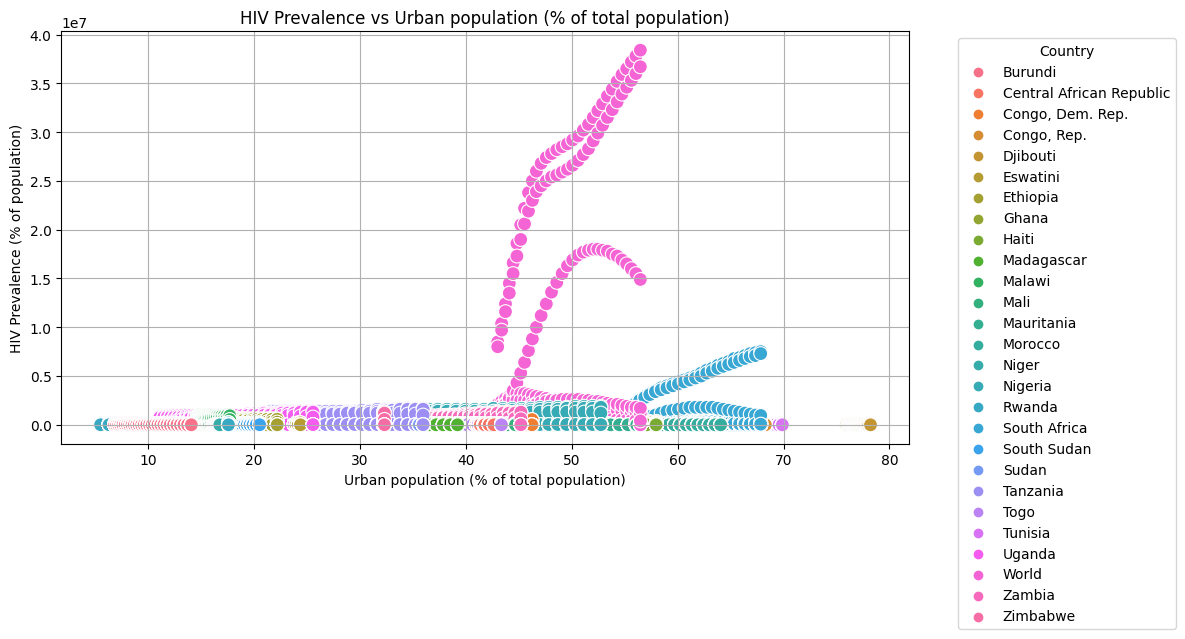

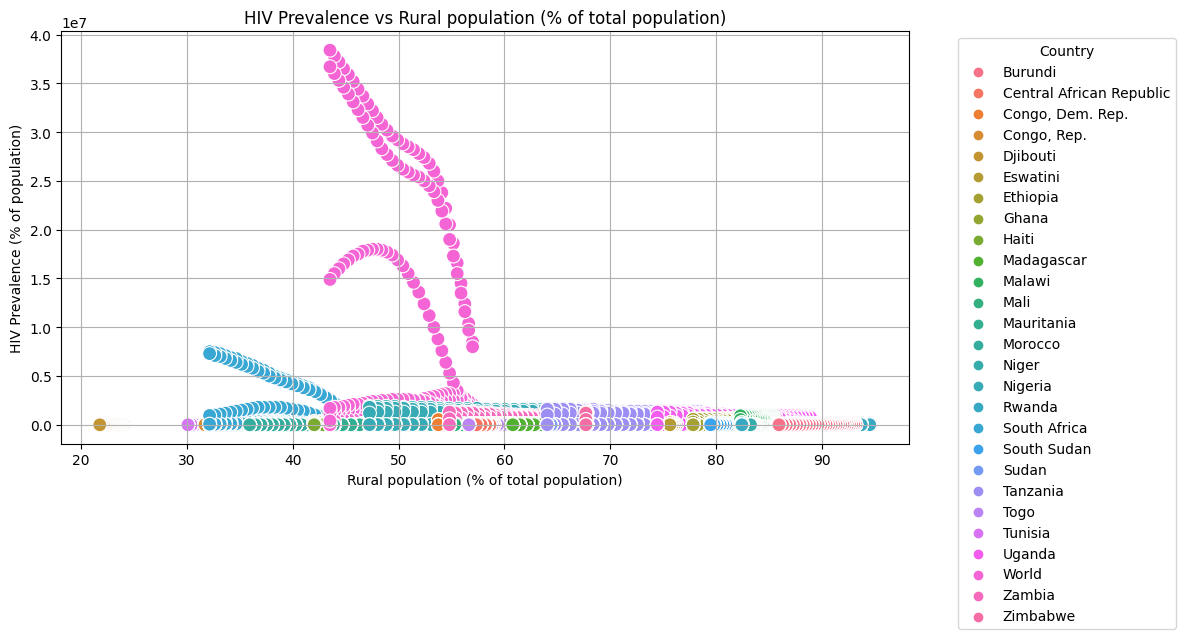

In [27]:
for indicator in socio_economic_indicators:
    plt.figure(figsize=(12, 6))
    subset = merged_data[merged_data['Indicator.Name_Socio'] == indicator]
    sns.scatterplot(x='Value_Socio', y='Value_HIV', data=subset, hue='Country.Name', s=100)
    plt.title(f'HIV Prevalence vs {indicator}')
    plt.xlabel(indicator)
    plt.ylabel('HIV Prevalence (% of population)')
    plt.grid(True)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [28]:
hiv_indicators = data[data['Indicator.Name'].str.contains('HIV')]
socio_economic_data = data[data['Indicator.Name'].isin(socio_economic_indicators)]

hiv_melted = pd.melt(hiv_indicators, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], var_name='Year', value_name='Value')
socio_melted = pd.melt(socio_economic_data, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], var_name='Year', value_name='Value')

hiv_melted['Year'] = hiv_melted['Year'].str[1:].astype(int)
socio_melted['Year'] = socio_melted['Year'].str[1:].astype(int)

hiv_melted.dropna(inplace=True)
socio_melted.dropna(inplace=True)


In [29]:
merged_data = pd.merge(hiv_melted, socio_melted, on=['Country.Name', 'Country.Code', 'Year'], suffixes=('_HIV', '_Socio'))


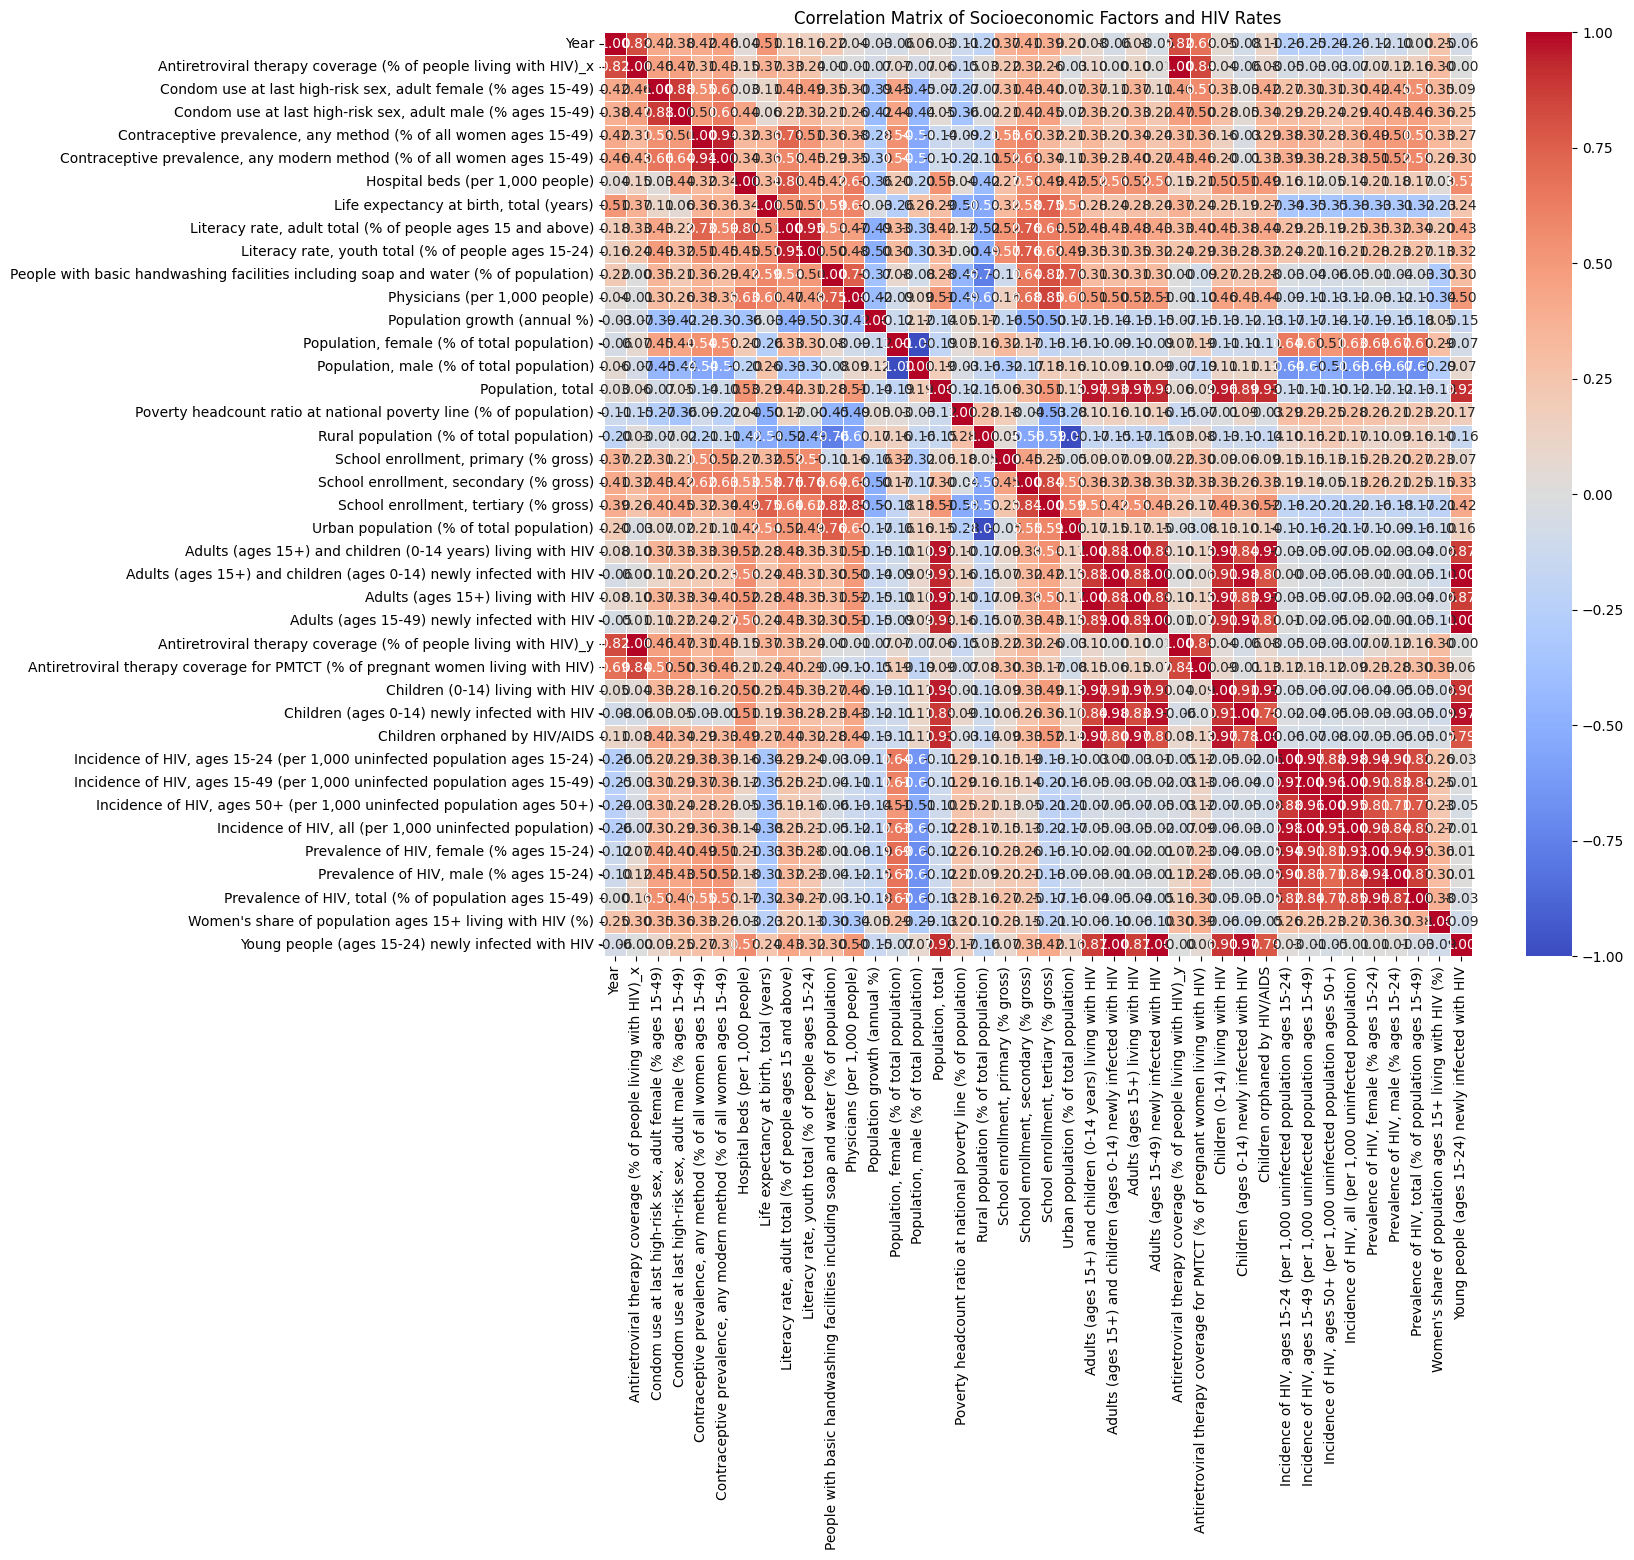

In [31]:
# Pivot the merged data to create a wide-format dataframe for the correlation matrix
wide_data = merged_data.pivot_table(index=['Country.Name', 'Year'], columns='Indicator.Name_Socio', values='Value_Socio').reset_index()

# Merge the HIV data
wide_data = pd.merge(wide_data, hiv_melted.pivot_table(index=['Country.Name', 'Year'], columns='Indicator.Name', values='Value').reset_index(), on=['Country.Name', 'Year'])

# Exclude non-numeric columns for correlation calculation
numeric_columns = wide_data.select_dtypes(include=['number']).columns
corr_matrix = wide_data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Socioeconomic Factors and HIV Rates')
plt.show()


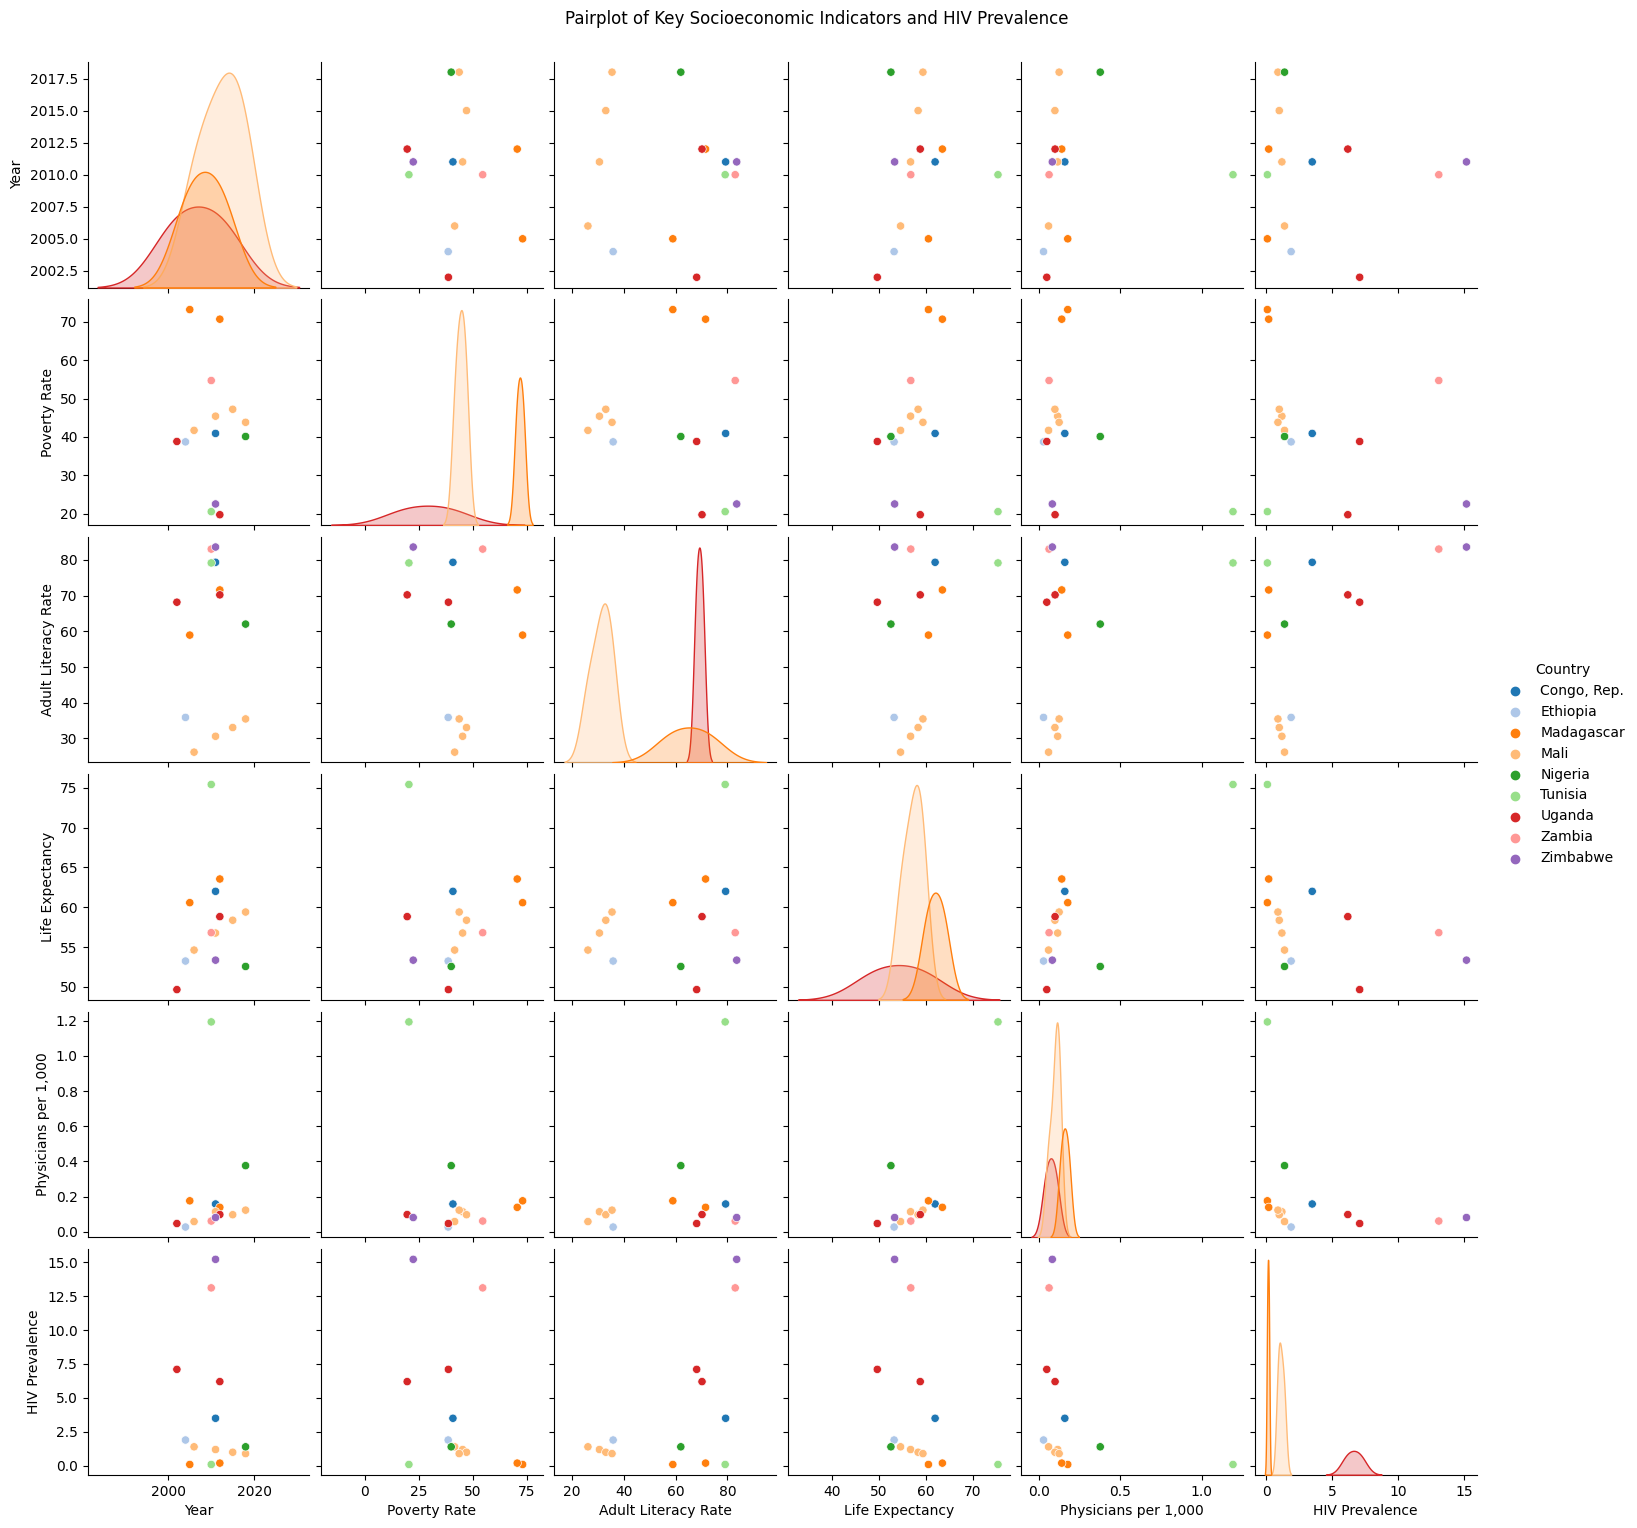

In [32]:
key_indicators = [
    'Poverty headcount ratio at national poverty line (% of population)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Life expectancy at birth, total (years)',
    'Physicians (per 1,000 people)',
    'Prevalence of HIV, total (% of population ages 15-49)'
]

# Filter the wide data for these key indicators
key_data = wide_data[['Country.Name', 'Year'] + key_indicators].dropna()

# Rename columns for better readability in plots
key_data.columns = ['Country', 'Year', 'Poverty Rate', 'Adult Literacy Rate', 'Life Expectancy', 'Physicians per 1,000', 'HIV Prevalence']

# Create the pairplot
sns.pairplot(key_data, hue='Country', markers='o', palette='tab20', diag_kind='kde')
plt.suptitle('Pairplot of Key Socioeconomic Indicators and HIV Prevalence', y=1.02)
plt.show()


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('dataviz24.csv')
key_indicators = [
    'Poverty headcount ratio at national poverty line (% of population)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Life expectancy at birth, total (years)',
    'Physicians (per 1,000 people)'
]


In [37]:
hiv_prevalence = data[data['Indicator.Name'] == 'Prevalence of HIV, total (% of population ages 15-49)']
hiv_melted = pd.melt(hiv_prevalence, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], var_name='Year', value_name='HIV_Prevalence')
hiv_melted['Year'] = hiv_melted['Year'].str[1:].astype(int)
hiv_melted.dropna(inplace=True)


In [38]:
socio_economic_data = data[data['Indicator.Name'].isin(key_indicators)]
socio_melted = pd.melt(socio_economic_data, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], var_name='Year', value_name='Value')
socio_melted['Year'] = socio_melted['Year'].str[1:].astype(int)
socio_melted.dropna(inplace=True)


In [41]:
merged_data = pd.merge(hiv_melted, socio_melted, on=['Country.Name', 'Country.Code', 'Year'])
merged_data

Country.Name Country.Code  \
0                      Burundi          BDI   
1                      Burundi          BDI   
2                      Burundi          BDI   
3     Central African Republic          CAF   
4     Central African Republic          CAF   
...                        ...          ...   
1412                     World          WLD   
1413                     World          WLD   
1414                    Zambia          ZMB   
1415                    Zambia          ZMB   
1416                  Zimbabwe          ZWE   

                                       Indicator.Name_x Indicator.Code_x  \
0     Prevalence of HIV, total (% of population ages...   SH.DYN.AIDS.ZS   
1     Prevalence of HIV, total (% of population ages...   SH.DYN.AIDS.ZS   
2     Prevalence of HIV, total (% of population ages...   SH.DYN.AIDS.ZS   
3     Prevalence of HIV, total (% of population ages...   SH.DYN.AIDS.ZS   
4     Prevalence of HIV, total (% of population ages...   SH.DYN.AIDS.ZS   
...                                                 ...              ...   
1412  Prevalence of HIV, total (% of population ages...   SH.DYN.AIDS.ZS   
1413  Prevalence of HIV, total (% of population ages...   SH.DYN.AIDS.ZS   
1414  Prevalence of HIV, total (% of population ages...   SH.DYN.AIDS.ZS   
1415  Prevalence of HIV, total (% of population ages...   SH.DYN.AIDS.ZS   
1416  Prevalence of HIV, total (% of population ages...   SH.DYN.AIDS.ZS   

      Year  HIV_Prevalence                                   Indicator.Name_y  \
0     1990             4.2            Life expectancy at birth, total (years)   
1     1990             4.2  Literacy rate, adult total (% of people ages 1...   
2     1990             4.2                      Physicians (per 1,000 people)   
3     1990             4.0            Life expectancy at birth, total (years)   
4     1990             4.0                      Physicians (per 1,000 people)   
...    ...             ...                                                ...   
1412  2021             0.7            Life expectancy at birth, total (years)   
1413  2021             0.7  Literacy rate, adult total (% of people ages 1...   
1414  2021            10.8            Life expectancy at birth, total (years)   
1415  2021            10.8                      Physicians (per 1,000 people)   
1416  2021            11.6            Life expectancy at birth, total (years)   

     Indicator.Code_y      Value  
0      SP.DYN.LE00.IN  44.860000  
1      SE.ADT.LITR.ZS  37.384720  
2      SH.MED.PHYS.ZS   0.058000  
3      SP.DYN.LE00.IN  49.635000  
4      SH.MED.PHYS.ZS   0.038000  
...               ...        ...  
1412   SP.DYN.LE00.IN  71.326865  
1413   SE.ADT.LITR.ZS  86.852753  
1414   SP.DYN.LE00.IN  61.223000  
1415   SH.MED.PHYS.ZS   0.297000  
1416   SP.DYN.LE00.IN  59.253000  

[1417 rows x 9 columns]

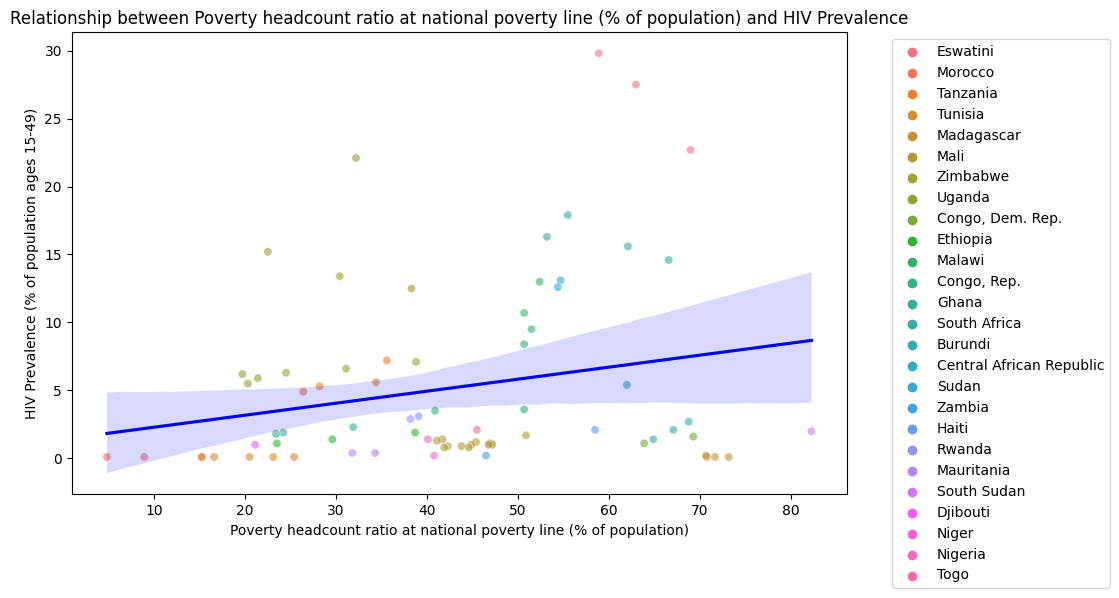

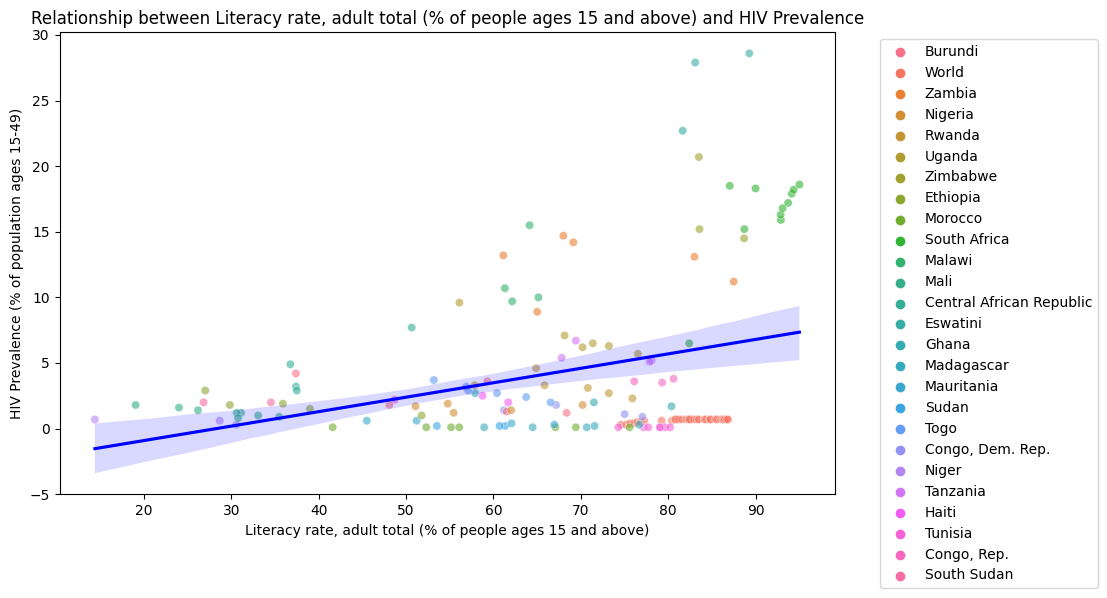

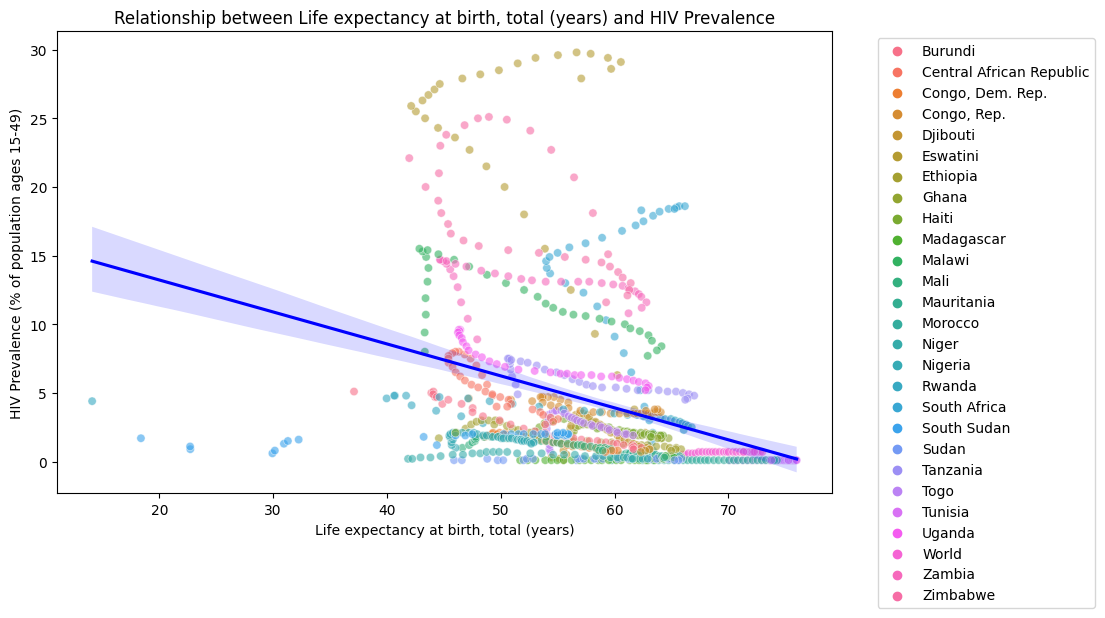

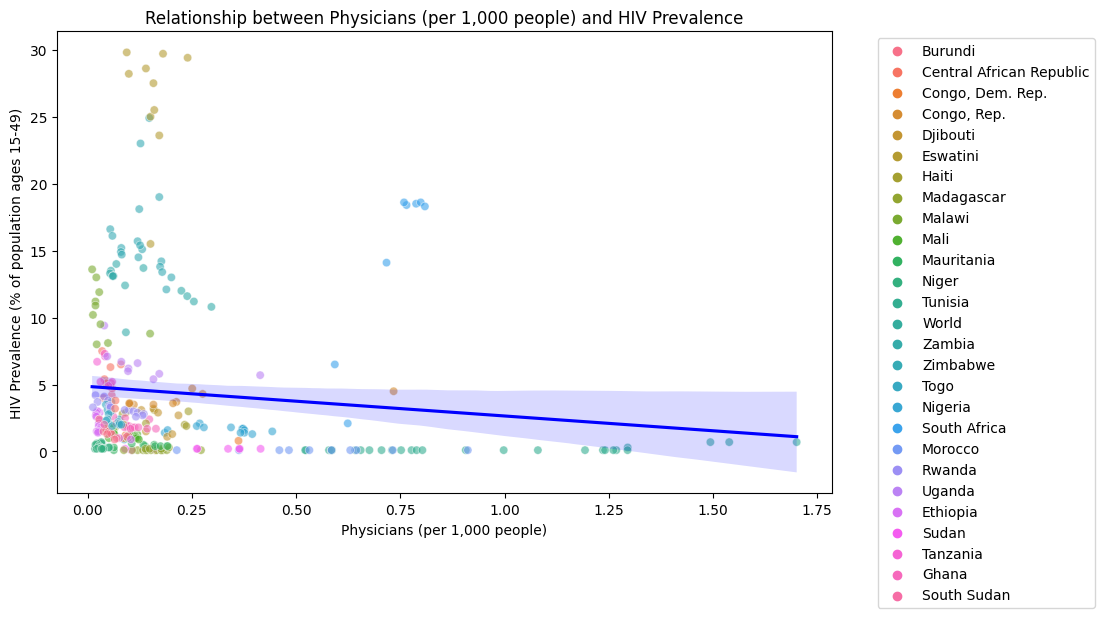

In [42]:
for indicator in key_indicators:
    subset = merged_data[merged_data['Indicator.Name_y'] == indicator]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=subset, x='Value', y='HIV_Prevalence', hue='Country.Name', alpha=0.6)
    sns.regplot(data=subset, x='Value', y='HIV_Prevalence', scatter=False, color='blue')
    plt.title(f'Relationship between {indicator} and HIV Prevalence')
    plt.xlabel(indicator)
    plt.ylabel('HIV Prevalence (% of population ages 15-49)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


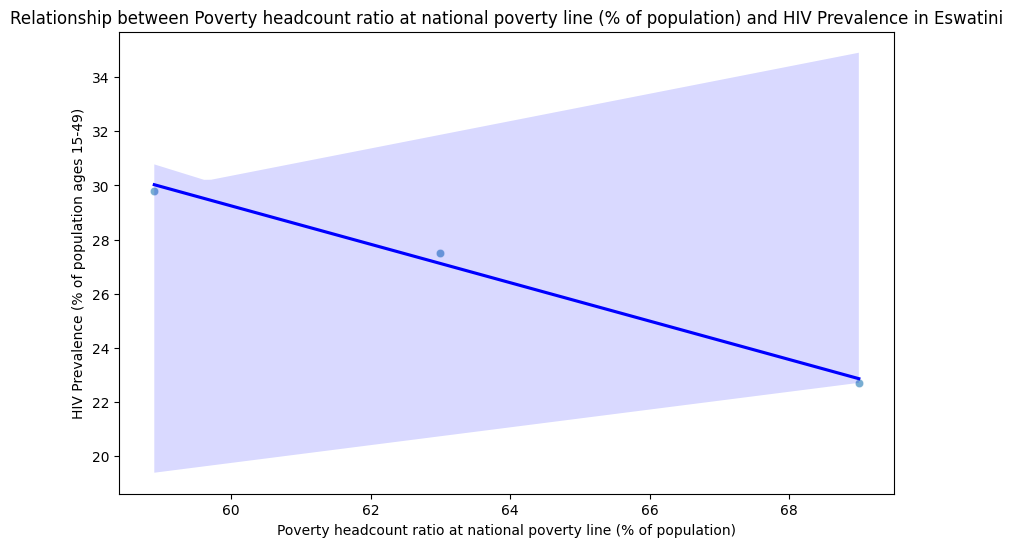

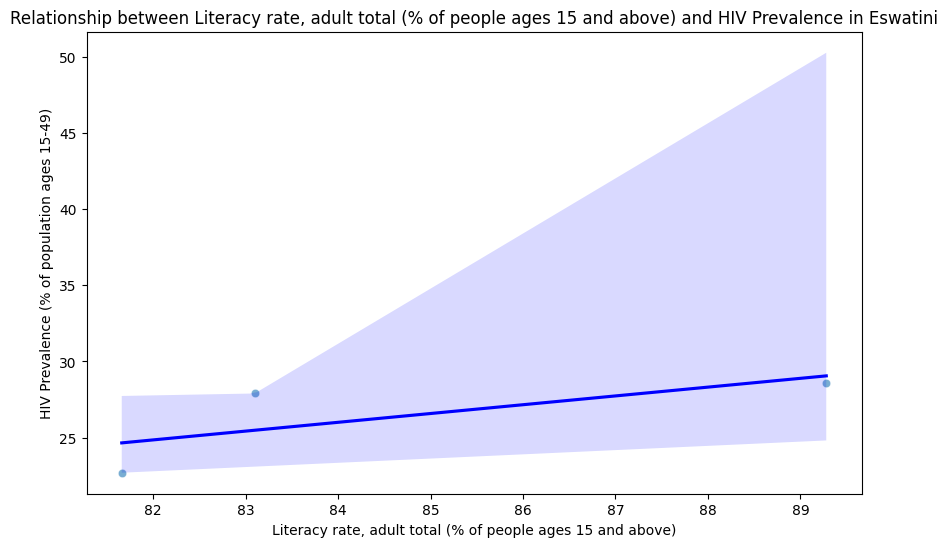

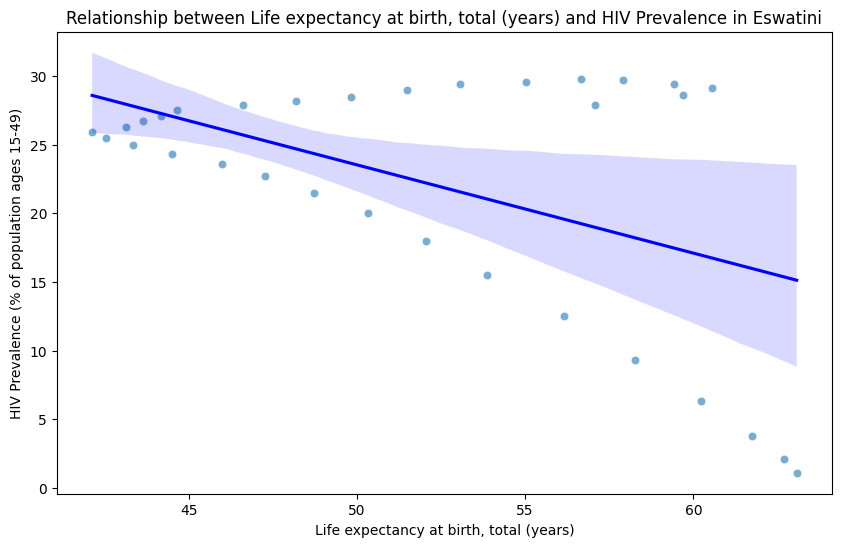

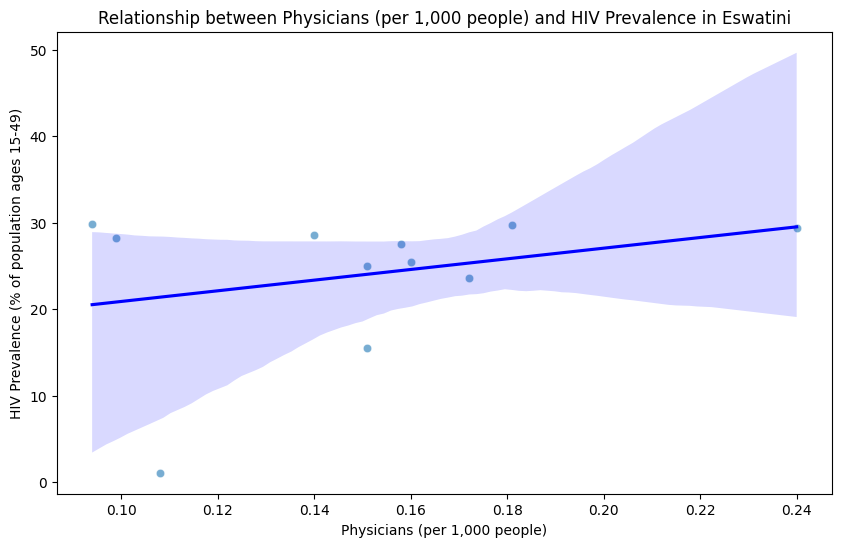

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data
data = pd.read_csv('dataviz24.csv')

# Select key socioeconomic indicators
key_indicators = [
    'Poverty headcount ratio at national poverty line (% of population)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Life expectancy at birth, total (years)',
    'Physicians (per 1,000 people)'
]

# Filter and prepare the HIV prevalence data for Eswatini
hiv_prevalence = data[(data['Country.Name'] == 'Eswatini') & (data['Indicator.Name'] == 'Prevalence of HIV, total (% of population ages 15-49)')]
hiv_melted = pd.melt(hiv_prevalence, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], var_name='Year', value_name='HIV_Prevalence')
hiv_melted['Year'] = hiv_melted['Year'].str[1:].astype(int)
hiv_melted.dropna(inplace=True)

# Filter and prepare the socioeconomic data for Eswatini
socio_economic_data = data[(data['Country.Name'] == 'Eswatini') & (data['Indicator.Name'].isin(key_indicators))]
socio_melted = pd.melt(socio_economic_data, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], var_name='Year', value_name='Value')
socio_melted['Year'] = socio_melted['Year'].str[1:].astype(int)
socio_melted.dropna(inplace=True)

# Merge the data
merged_data = pd.merge(hiv_melted, socio_melted, on=['Country.Name', 'Country.Code', 'Year'])

# Plot scatter plots with regression lines for Eswatini
for indicator in key_indicators:
    subset = merged_data[merged_data['Indicator.Name_y'] == indicator]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=subset, x='Value', y='HIV_Prevalence', alpha=0.6)
    sns.regplot(data=subset, x='Value', y='HIV_Prevalence', scatter=False, color='blue')
    plt.title(f'Relationship between {indicator} and HIV Prevalence in Eswatini')
    plt.xlabel(indicator)
    plt.ylabel('HIV Prevalence (% of population ages 15-49)')
    plt.show()


                                Indicator.Name_Socio  Correlation
1  Literacy rate, adult total (% of people ages 1...     0.724905
2                      Physicians (per 1,000 people)     0.296626
0            Life expectancy at birth, total (years)    -0.493645
3  Poverty headcount ratio at national poverty li...    -0.995737


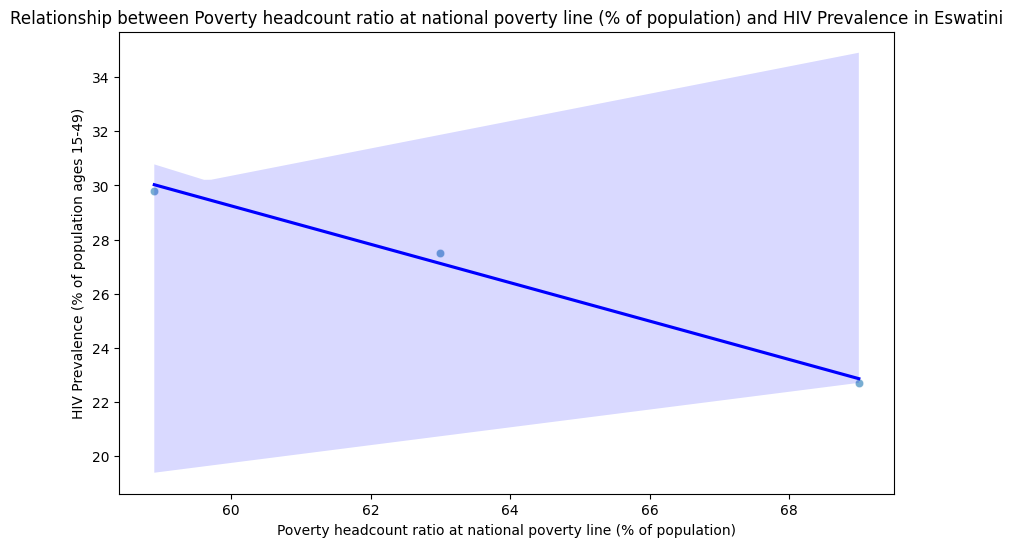

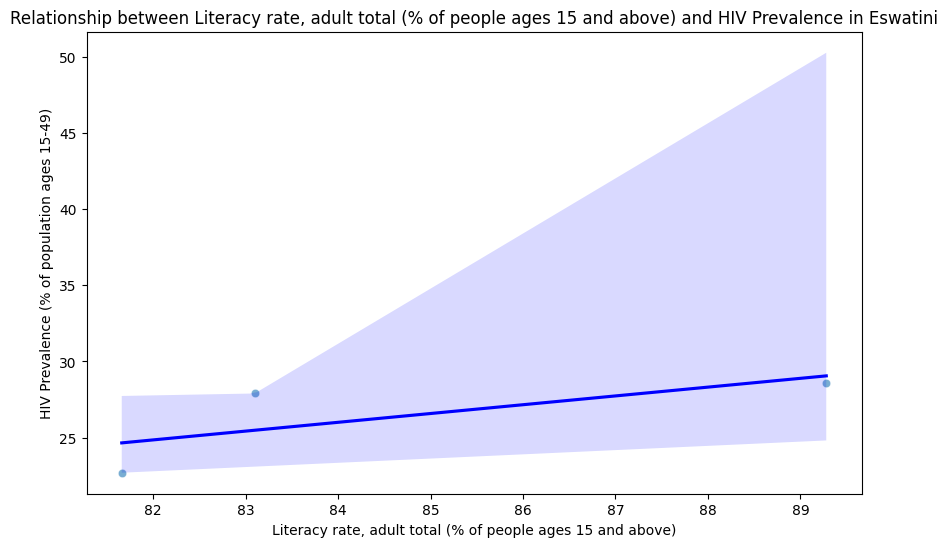

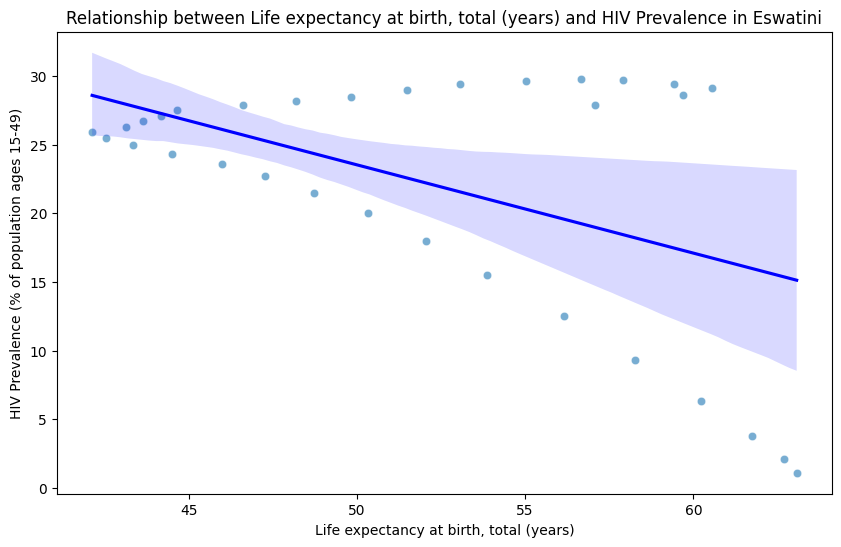

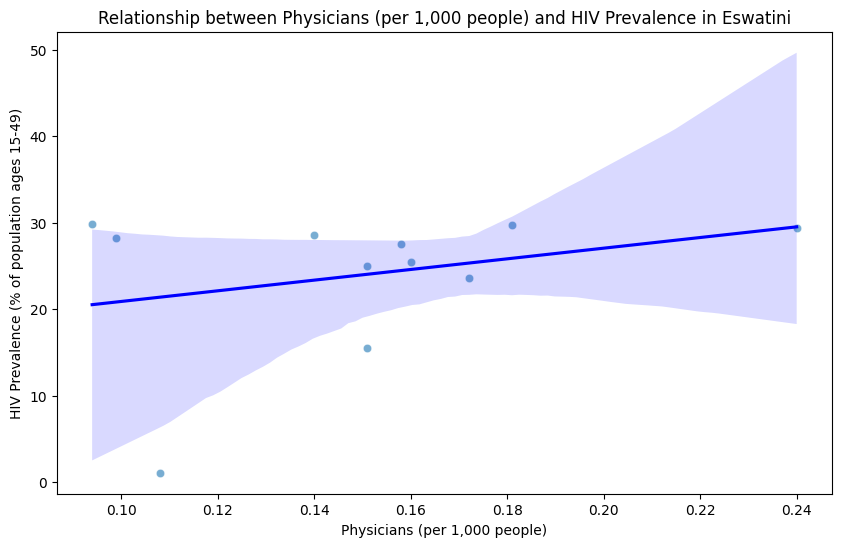

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import the data
data = pd.read_csv('dataviz24.csv')

# Select key socioeconomic indicators
key_indicators = [
    'Poverty headcount ratio at national poverty line (% of population)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Life expectancy at birth, total (years)',
    'Physicians (per 1,000 people)'
]

# Filter and prepare the HIV prevalence data for Eswatini
hiv_prevalence = data[(data['Country.Name'] == 'Eswatini') & (data['Indicator.Name'] == 'Prevalence of HIV, total (% of population ages 15-49)')]
hiv_melted = pd.melt(hiv_prevalence, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], var_name='Year', value_name='HIV_Prevalence')
hiv_melted['Year'] = hiv_melted['Year'].str[1:].astype(int)
hiv_melted.dropna(inplace=True)

# Filter and prepare the socioeconomic data for Eswatini
socio_economic_data = data[(data['Country.Name'] == 'Eswatini') & (data['Indicator.Name'].isin(key_indicators))]
socio_melted = pd.melt(socio_economic_data, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'], var_name='Year', value_name='Value')
socio_melted['Year'] = socio_melted['Year'].str[1:].astype(int)
socio_melted.dropna(inplace=True)

# Merge the data
merged_data = pd.merge(hiv_melted, socio_melted, on=['Country.Name', 'Country.Code', 'Year'], suffixes=('_HIV', '_Socio'))

# Calculate correlation coefficients
correlations = merged_data.groupby('Indicator.Name_Socio').apply(lambda x: x['HIV_Prevalence'].corr(x['Value'])).reset_index()
correlations.columns = ['Indicator.Name_Socio', 'Correlation']
correlations.sort_values(by='Correlation', ascending=False, inplace=True)
print(correlations)

# Plot scatter plots with regression lines for Eswatini
for indicator in key_indicators:
    subset = merged_data[merged_data['Indicator.Name_Socio'] == indicator]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=subset, x='Value', y='HIV_Prevalence', alpha=0.6)
    sns.regplot(data=subset, x='Value', y='HIV_Prevalence', scatter=False, color='blue')
    plt.title(f'Relationship between {indicator} and HIV Prevalence in Eswatini')
    plt.xlabel(indicator)
    plt.ylabel('HIV Prevalence (% of population ages 15-49)')
    plt.show()


In [6]:
import pandas as pd

# Load the data
data = pd.read_csv('dataviz24.csv')

# Drop the Indicator Name column
data = data.drop(columns=['Indicator.Name'])

# Modify the Year column to remove 'X'
data.columns = data.columns.str.replace('X', '')
# Melt the dataframe to have years in one column
melted = pd.melt(data, id_vars=['Country.Name', 'Country.Code', 'Indicator.Code'], 
                 var_name='Year', value_name='Value')

# Pivot the dataframe to have Indicator.Code as columns
pivoted = melted.pivot_table(index=['Country.Name', 'Country.Code', 'Year'], 
                             columns='Indicator.Code', values='Value').reset_index()

# Rename the columns (optional, for clarity)
pivoted.columns.name = None

# Display the transformed DataFrame
print(pivoted.head())

# Save the transformed DataFrame to a new CSV file
pivoted.to_csv('transformed_data.csv', index=False)


  Country.Name Country.Code  Year  NY.GNP.PCAP.CD  SE.ADT.1524.LT.MA.ZS  \
0      Burundi          BDI  1990           220.0             59.497841   
1      Burundi          BDI  1991           220.0                   NaN   
2      Burundi          BDI  1992           210.0                   NaN   
3      Burundi          BDI  1993           190.0                   NaN   
4      Burundi          BDI  1994           170.0                   NaN   

   SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  \
0           53.55521          27.529301          48.236252        37.38472   
1                NaN                NaN                NaN             NaN   
2                NaN                NaN                NaN             NaN   
3                NaN                NaN                NaN             NaN   
4                NaN                NaN                NaN             NaN   

   SE.PRM.ENRR  ...  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  \


In [7]:
# Load the transformed data
transformed_data = pd.read_csv('transformed_data.csv')

# Subset the data for Zimbabwe and year > 1995
subset = transformed_data[(transformed_data['Country.Name'] == 'Zimbabwe') & (transformed_data['Year'] > 1995)]

# Display the subset
print(subset)


    Country.Name Country.Code  Year  NY.GNP.PCAP.CD  SE.ADT.1524.LT.MA.ZS  \
838     Zimbabwe          ZWE  1996           560.0                   NaN   
839     Zimbabwe          ZWE  1997           520.0                   NaN   
840     Zimbabwe          ZWE  1998           410.0                   NaN   
841     Zimbabwe          ZWE  1999           400.0                   NaN   
842     Zimbabwe          ZWE  2000           360.0                   NaN   
843     Zimbabwe          ZWE  2001           390.0                   NaN   
844     Zimbabwe          ZWE  2002           370.0                   NaN   
845     Zimbabwe          ZWE  2003           340.0                   NaN   
846     Zimbabwe          ZWE  2004           320.0                   NaN   
847     Zimbabwe          ZWE  2005           330.0                   NaN   
848     Zimbabwe          ZWE  2006           290.0                   NaN   
849     Zimbabwe          ZWE  2007           250.0                   NaN   

In [15]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the indicators
subsetted_data = subset[["Country.Name","Year","SH.DYN.AIDS.ZS","SP.ADO.TFRT", "SH.HIV.TOTL", "SH.HIV.INCD.TL", "SH.DYN.AIDS", "SH.HIV.INCD", "SP.POP.DPND", "SP.POP.DPND.OL", "SP.POP.DPND.YG", "SH.DYN.AIDS.DH", "SH.HIV.ARTC.ZS", "SH.HIV.PMTC.ZS", "SP.DYN.CBRT.IN", "SH.STA.BRTC.ZS", "SH.XPD.KHEX.GD.ZS", "SH.DTH.COMM.ZS", "SH.DTH.NCOM.ZS", "SH.HIV.0014", "SH.HIV.INCD.14", "SH.HIV.ORPH", "SH.MED.CMHW.P3"]]

# Display the subsetted data
print(subsetted_data)



    Country.Name  Year  SH.DYN.AIDS.ZS  SP.ADO.TFRT  SH.HIV.TOTL  \
838     Zimbabwe  1996            25.1       96.313      1600000   
839     Zimbabwe  1997            25.0       97.426      1600000   
840     Zimbabwe  1998            24.5       98.390      1600000   
841     Zimbabwe  1999            23.8      100.369      1600000   
842     Zimbabwe  2000            23.0      100.942      1600000   
843     Zimbabwe  2001            22.1      102.830      1600000   
844     Zimbabwe  2002            21.0      102.211      1500000   
845     Zimbabwe  2003            20.0      103.219      1500000   
846     Zimbabwe  2004            19.0      103.553      1400000   
847     Zimbabwe  2005            18.1      106.648      1400000   
848     Zimbabwe  2006            17.3      104.788      1300000   
849     Zimbabwe  2007            16.6      103.970      1300000   
850     Zimbabwe  2008            16.1      107.481      1300000   
851     Zimbabwe  2009            15.7      109.

In [24]:
newdata = transformed_data.drop(columns=['Country.Name','Country.Code','Year'])
# Compute the correlation matrix
corr_matrix = newdata.corr()
pd.set_option('display.max_rows', None)
# Print the correlation matrix
print(corr_matrix['SH.DYN.AIDS.ZS'].sort_values(ascending=False))



SH.DYN.AIDS.ZS          1.000000
SH.HIV.1524.FE.ZS       0.946808
SH.HIV.1524.MA.ZS       0.868540
SH.HIV.INCD.TL.P3       0.854221
SH.HIV.INCD.ZS          0.839379
SH.STA.SUIC.MA.P5       0.827521
SH.STA.SUIC.P5          0.822822
SH.HIV.INCD.YG.P3       0.822777
SH.HIV.INCD.50.P3       0.773673
SH.XPD.EHEX.PC.CD       0.739642
SH.XPD.EHEX.PP.CD       0.737075
SH.STA.SUIC.FE.P5       0.697244
SH.MED.CMHW.P3          0.679274
SP.POP.TOTL.FE.ZS       0.674647
SP.DYN.AMRT.MA          0.673782
SP.DYN.AMRT.FE          0.603330
SP.DYN.CONM.AL.ZS       0.585540
SH.CON.AIDS.FE.ZS       0.551933
SH.CON.1524.MA.ZS       0.550706
SP.DYN.CONU.AL.ZS       0.549380
SH.FPL.SATM.ZS          0.480678
SH.CON.AIDS.MA.ZS       0.458319
SH.FPL.SATI.ZS          0.455532
SP.POP.2024.FE.5Y       0.446141
SP.DYN.CONM.SA.ZS       0.426989
SH.ALC.PCAP.MA.LI       0.420054
SH.ALC.PCAP.LI          0.399374
SP.DYN.CONM.ZS          0.396213
SH.CON.1524.FE.ZS       0.388476
SH.DYN.AIDS.FE.ZS       0.380540
SP.HOU.FEM

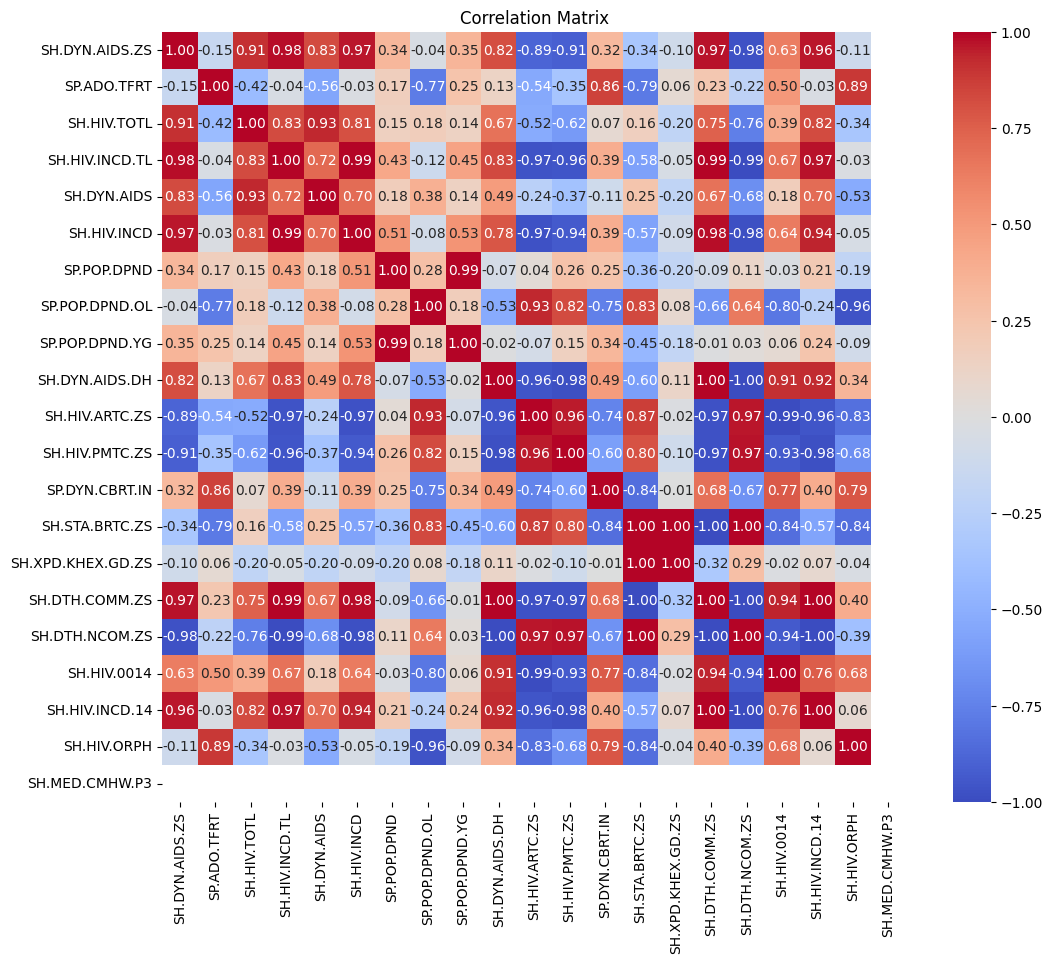

In [21]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Shape of X: (26, 20)
Shape of y: (26,)
Permutation importance results: {'importances_mean': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), 'importances_std': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), 'importances': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0

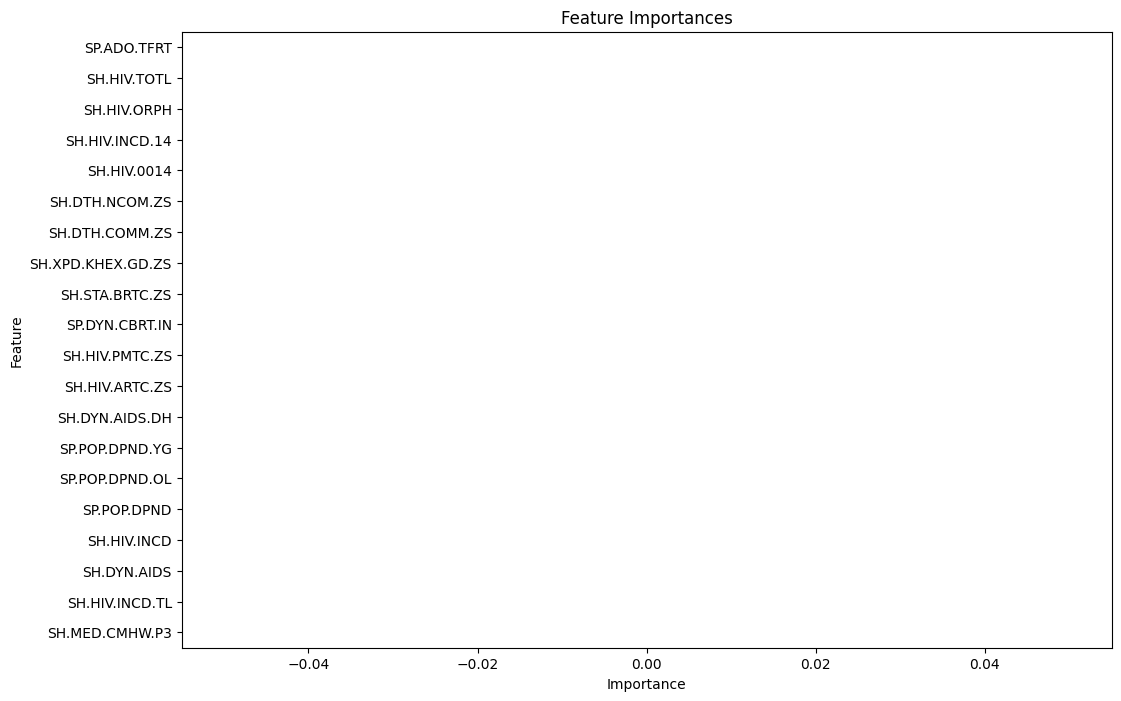

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming subsetted_data is your DataFrame

# Separate predictors and outcome
X = subsetted_data.drop(columns=['SH.DYN.AIDS.ZS','Country.Name','Year'])
y = subsetted_data['SH.DYN.AIDS.ZS']

# Print the shapes of X and y to ensure they are correct
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Initialize the HistGradientBoostingRegressor
hgb = HistGradientBoostingRegressor(random_state=42)

# Fit the model
hgb.fit(X, y)

# Compute permutation feature importance
result = permutation_importance(hgb, X, y, n_repeats=10, random_state=42, n_jobs=-1)

# Print the results to check if they are computed correctly
print(f"Permutation importance results: {result}")

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
})

# Print the importance DataFrame to check the values
print(importance_df)

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

## checking zimbabwe

In [2]:
import pandas as pd

# Load the dataset
zimbabwe_data = pd.read_excel('Zimbabwe.xlsx')

# Melt the dataset to convert years into a single column
zimbabwe_data_melted = pd.melt(zimbabwe_data, 
                               id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'],
                               var_name='Year', 
                               value_name='Value')

# Convert the 'Year' column to numeric by removing the 'X' prefix
zimbabwe_data_melted['Year'] = zimbabwe_data_melted['Year'].str.replace('X', '').astype(int)

# Drop rows with missing values
zimbabwe_data_cleaned = zimbabwe_data_melted.dropna(subset=['Value'])

# Display the first few rows of the cleaned dataset
zimbabwe_data_cleaned.head(100)


Country.Name Country.Code  \
0       Zimbabwe          ZWE   
1       Zimbabwe          ZWE   
2       Zimbabwe          ZWE   
3       Zimbabwe          ZWE   
4       Zimbabwe          ZWE   
..           ...          ...   
145     Zimbabwe          ZWE   
146     Zimbabwe          ZWE   
147     Zimbabwe          ZWE   
148     Zimbabwe          ZWE   
149     Zimbabwe          ZWE   

                                        Indicator.Name     Indicator.Code  \
0    Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
1    Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
2    Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   
3                    Adults (ages 15+) living with HIV        SH.DYN.AIDS   
4          Adults (ages 15-49) newly infected with HIV        SH.HIV.INCD   
..                                                 ...                ...   
145  Population ages 50-54, female (% of female pop...  SP.POP.5054.FE.5Y   
146                        Population ages 50-54, male     SP.POP.5054.MA   
147  Population ages 50-54, male (% of male populat...  SP.POP.5054.MA.5Y   
148                      Population ages 55-59, female     SP.POP.5559.FE   
149  Population ages 55-59, female (% of female pop...  SP.POP.5559.FE.5Y   

     Year          Value  
0    1990     102.251000  
1    1990  790000.000000  
2    1990  220000.000000  
3    1990  740000.000000  
4    1990  180000.000000  
..    ...            ...  
145  1990       2.136570  
146  1990   97428.000000  
147  1990       2.002202  
148  1990   95385.000000  
149  1990       1.817601  

[100 rows x 6 columns]

In [4]:
import pandas as pd

# Load the dataset
zimbabwe_data = pd.read_excel('Zimbabwe.xlsx')

# Melt the dataset to convert years into a single column
zimbabwe_data_melted = pd.melt(zimbabwe_data, 
                               id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'],
                               var_name='Year', 
                               value_name='Value')

# Convert the 'Year' column to numeric by removing the 'X' prefix
zimbabwe_data_melted['Year'] = zimbabwe_data_melted['Year'].str.replace('X', '').astype(int)

# List of relevant social/environmental indicators (Example, update based on your data)
relevant_indicators = [
    'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Access to electricity (% of population)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'School enrollment, primary (% net)'
]

# Filter for the relevant indicators
filtered_data = zimbabwe_data_melted[zimbabwe_data_melted['Indicator.Name'].isin(relevant_indicators + ['Adults (ages 15+) living with HIV'])]

# Drop rows with missing values
cleaned_data = filtered_data.dropna(subset=['Value'])

# Display the first few rows of the cleaned dataset
cleaned_data.head(25)


Country.Name Country.Code  \
3        Zimbabwe          ZWE   
237      Zimbabwe          ZWE   
471      Zimbabwe          ZWE   
529      Zimbabwe          ZWE   
705      Zimbabwe          ZWE   
939      Zimbabwe          ZWE   
1173     Zimbabwe          ZWE   
1407     Zimbabwe          ZWE   
1641     Zimbabwe          ZWE   
1875     Zimbabwe          ZWE   
2068     Zimbabwe          ZWE   
2109     Zimbabwe          ZWE   
2302     Zimbabwe          ZWE   
2343     Zimbabwe          ZWE   
2536     Zimbabwe          ZWE   
2577     Zimbabwe          ZWE   
2770     Zimbabwe          ZWE   
2811     Zimbabwe          ZWE   
3004     Zimbabwe          ZWE   
3045     Zimbabwe          ZWE   
3238     Zimbabwe          ZWE   
3279     Zimbabwe          ZWE   
3513     Zimbabwe          ZWE   
3747     Zimbabwe          ZWE   
3981     Zimbabwe          ZWE   

                                         Indicator.Name  Indicator.Code  Year  \
3                     Adults (ages 15+) living with HIV     SH.DYN.AIDS  1990   
237                   Adults (ages 15+) living with HIV     SH.DYN.AIDS  1991   
471                   Adults (ages 15+) living with HIV     SH.DYN.AIDS  1992   
529   Literacy rate, adult total (% of people ages 1...  SE.ADT.LITR.ZS  1992   
705                   Adults (ages 15+) living with HIV     SH.DYN.AIDS  1993   
939                   Adults (ages 15+) living with HIV     SH.DYN.AIDS  1994   
1173                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  1995   
1407                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  1996   
1641                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  1997   
1875                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  1998   
2068                 School enrollment, primary (% net)     SE.PRM.NENR  1998   
2109                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  1999   
2302                 School enrollment, primary (% net)     SE.PRM.NENR  1999   
2343                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  2000   
2536                 School enrollment, primary (% net)     SE.PRM.NENR  2000   
2577                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  2001   
2770                 School enrollment, primary (% net)     SE.PRM.NENR  2001   
2811                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  2002   
3004                 School enrollment, primary (% net)     SE.PRM.NENR  2002   
3045                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  2003   
3238                 School enrollment, primary (% net)     SE.PRM.NENR  2003   
3279                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  2004   
3513                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  2005   
3747                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  2006   
3981                  Adults (ages 15+) living with HIV     SH.DYN.AIDS  2007   

             Value  
3     7.400000e+05  
237   9.200000e+05  
471   1.100000e+06  
529   8.351258e+01  
705   1.200000e+06  
939   1.300000e+06  
1173  1.400000e+06  
1407  1.400000e+06  
1641  1.500000e+06  
1875  1.500000e+06  
2068  8.451495e+01  
2109  1.500000e+06  
2302  8.687806e+01  
2343  1.400000e+06  
2536  8.876051e+01  
2577  1.400000e+06  
2770  9.214572e+01  
2811  1.300000e+06  
3004  8.961047e+01  
3045  1.300000e+06  
3238  8.894180e+01  
3279  1.200000e+06  
3513  1.200000e+06  
3747  1.200000e+06  
3981  1.100000e+06

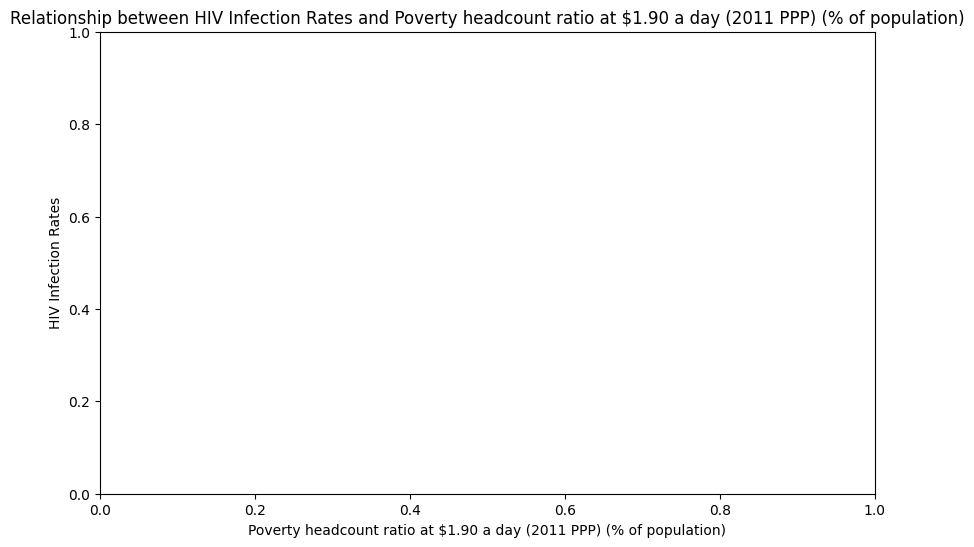

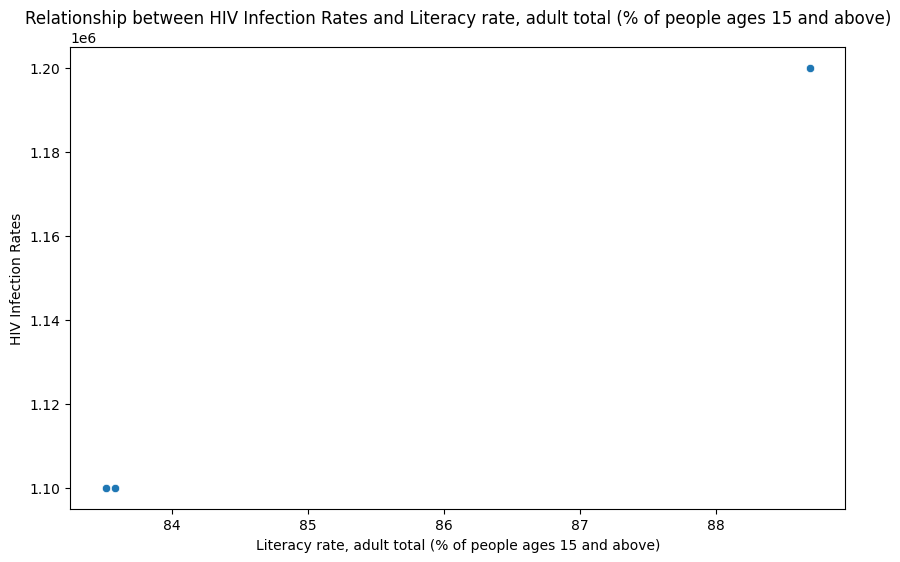

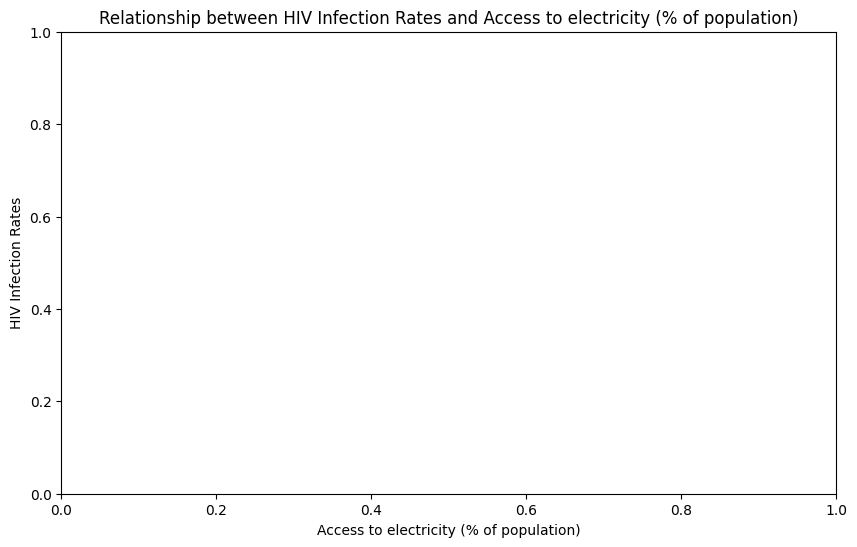

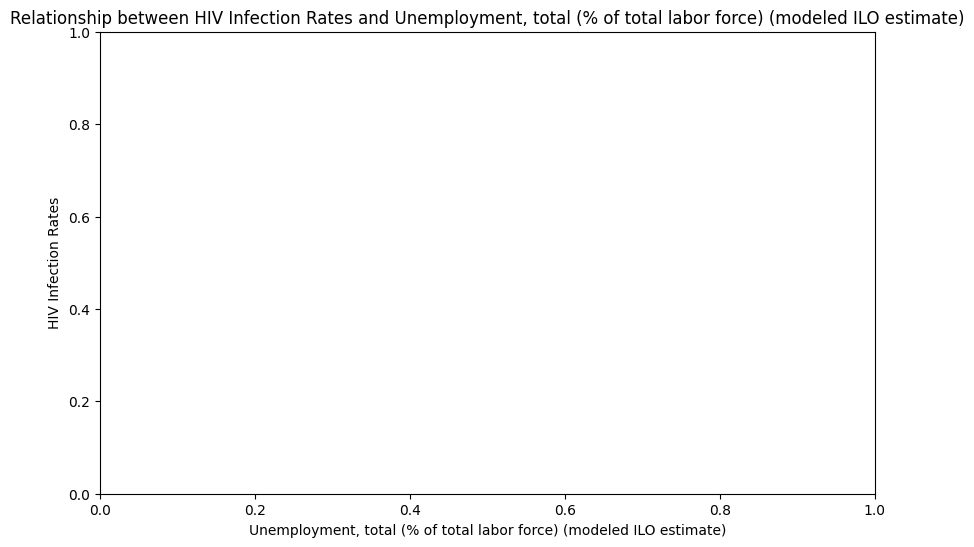

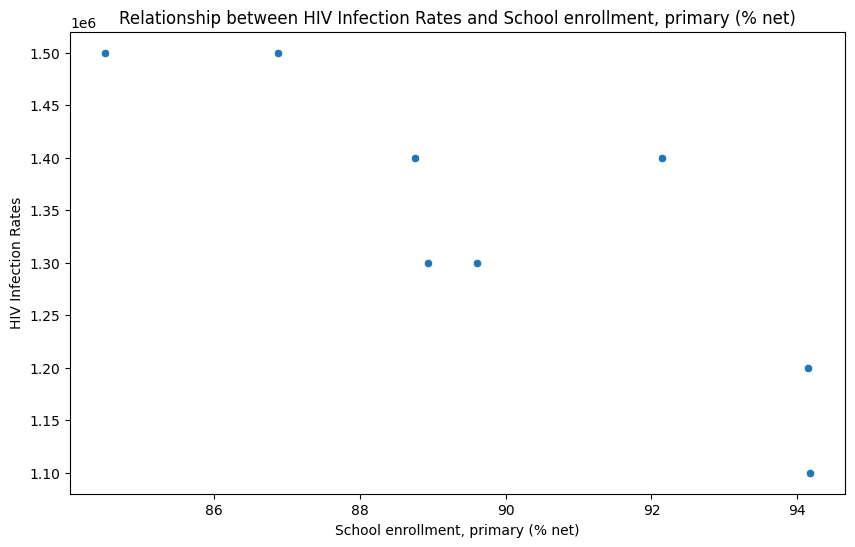

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data for HIV infection rates and social/environmental factors
hiv_data = cleaned_data[cleaned_data['Indicator.Name'] == 'Adults (ages 15+) living with HIV']
factor_data = cleaned_data[cleaned_data['Indicator.Name'].isin(relevant_indicators)]

# Merge the dataframes on Country, Year
merged_data = hiv_data.merge(factor_data, on=['Country.Name', 'Country.Code', 'Year'], suffixes=('_HIV', '_Factor'))

# Plot the relationships
for indicator in relevant_indicators:
    factor_specific_data = merged_data[merged_data['Indicator.Name_Factor'] == indicator]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=factor_specific_data, x='Value_Factor', y='Value_HIV')
    plt.title(f'Relationship between HIV Infection Rates and {indicator}')
    plt.xlabel(indicator)
    plt.ylabel('HIV Infection Rates')
    plt.show()


In [6]:
import statsmodels.api as sm

# Prepare the data for regression analysis
regression_data = merged_data.pivot_table(index=['Country.Name', 'Country.Code', 'Year', 'Value_HIV'],
                                          columns='Indicator.Name_Factor',
                                          values='Value_Factor').reset_index()

# Fit a regression model
X = regression_data[relevant_indicators]
y = regression_data['Value_HIV']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())


KeyError: "['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)', 'Access to electricity (% of population)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)'] not in index"

In [13]:
import pandas as pd
import statsmodels.api as sm

# Load the data
file_path = 'Zimbabwe.xlsx'
data = pd.read_excel(file_path)

# Define the outcome variable and socio-economic factors
outcome_variable = 'SH.DYN.AIDS.ZS'
socio_economic_factors = [
    'SP.ADO.TFRT', 'SH.HIV.TOTL', 'SH.HIV.INCD.TL', 'SP.POP.TOTL',
    'SP.DYN.CBRT.IN', 'SE.PRM.ENRR', 'SE.SEC.ENRR', 'SL.UEM.TOTL.ZS'
]

# Filter the data for the relevant indicators
filtered_data = data[data['Indicator.Code'].isin([outcome_variable] + socio_economic_factors)]

# Reshape the data from wide to long format
long_data = pd.melt(filtered_data, id_vars=['Country.Name', 'Country.Code', 'Indicator.Name', 'Indicator.Code'],
                    var_name='Year', value_name='Value')

# Pivot the data to have indicators as columns
pivot_data = long_data.pivot_table(index=['Country.Name', 'Country.Code', 'Year'], columns='Indicator.Code', values='Value').reset_index()

# Convert the 'Year' column to integer
pivot_data['Year'] = pivot_data['Year'].str[1:].astype(int)

# Drop rows with missing values
clean_data = pivot_data.dropna()

# Define the outcome and predictors
y = clean_data[outcome_variable]
X = clean_data[socio_economic_factors]

# Add a constant to the predictors
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         SH.DYN.AIDS.ZS   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     95.68
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           0.000267
Time:                        12:40:14   Log-Likelihood:               -0.14300
No. Observations:                  13   AIC:                             18.29
Df Residuals:                       4   BIC:                             23.37
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.3856     22.547      0.

C:\Users\TEJASVI SHEETY\anaconda3\envs\datascience\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:
pivot_data.head(33)

Indicator.Code Country.Name Country.Code  Year  SE.PRM.ENRR  SE.SEC.ENRR  \
0                  Zimbabwe          ZWE  1990    94.880501    43.763439   
1                  Zimbabwe          ZWE  1991    99.312714    45.257229   
2                  Zimbabwe          ZWE  1992    97.423668    40.435741   
3                  Zimbabwe          ZWE  1993    99.063904    38.262939   
4                  Zimbabwe          ZWE  1994          NaN    38.834560   
5                  Zimbabwe          ZWE  1995   102.874298    40.470402   
6                  Zimbabwe          ZWE  1996   105.010971    41.035889   
7                  Zimbabwe          ZWE  1997   107.934776    42.350231   
8                  Zimbabwe          ZWE  1998   108.907288          NaN   
9                  Zimbabwe          ZWE  1999   109.770378    41.398300   
10                 Zimbabwe          ZWE  2000   111.361443    41.602558   
11                 Zimbabwe          ZWE  2001   116.359543    43.313549   
12                 Zimbabwe          ZWE  2002   111.178101    42.398319   
13                 Zimbabwe          ZWE  2003   109.501442    40.048538   
14                 Zimbabwe          ZWE  2004          NaN          NaN   
15                 Zimbabwe          ZWE  2005          NaN          NaN   
16                 Zimbabwe          ZWE  2006          NaN          NaN   
17                 Zimbabwe          ZWE  2007          NaN          NaN   
18                 Zimbabwe          ZWE  2008          NaN          NaN   
19                 Zimbabwe          ZWE  2009          NaN          NaN   
20                 Zimbabwe          ZWE  2010          NaN          NaN   
21                 Zimbabwe          ZWE  2011          NaN          NaN   
22                 Zimbabwe          ZWE  2012   103.768784    52.513191   
23                 Zimbabwe          ZWE  2013   103.131477    51.849579   
24                 Zimbabwe          ZWE  2014   102.422211          NaN   
25                 Zimbabwe          ZWE  2015   101.521050          NaN   
26                 Zimbabwe          ZWE  2016   100.031082          NaN   
27                 Zimbabwe          ZWE  2017    98.545097          NaN   
28                 Zimbabwe          ZWE  2018    97.879272          NaN   
29                 Zimbabwe          ZWE  2019    97.476608          NaN   
30                 Zimbabwe          ZWE  2020    97.384163          NaN   
31                 Zimbabwe          ZWE  2021    96.015144          NaN   

Indicator.Code  SH.DYN.AIDS.ZS  SH.HIV.INCD.TL  SH.HIV.TOTL  SL.UEM.TOTL.ZS  \
0                         15.1        220000.0     790000.0             NaN   
1                         18.1        230000.0     980000.0           4.997   
2                         20.7        230000.0    1100000.0           5.069   
3                         22.7        220000.0    1300000.0           5.010   
4                         24.1        200000.0    1400000.0           4.960   
5                         24.9        190000.0    1500000.0           5.654   
6                         25.1        170000.0    1600000.0           6.236   
7                         25.0        160000.0    1600000.0           6.930   
8                         24.5        140000.0    1600000.0           6.453   
9                         23.8        130000.0    1600000.0           6.000   
10                        23.0        130000.0    1600000.0           5.688   
11                        22.1        120000.0    1600000.0           5.340   
12                        21.0        110000.0    1500000.0           5.069   
13                        20.0        100000.0    1500000.0           4.774   
14                        19.0         99000.0    1400000.0           4.390   
15                        18.1         95000.0    1400000.0           4.546   
16                        17.3         92000.0    1300000.0           4.692   
17                        16.6         88000.0    1300000.0          

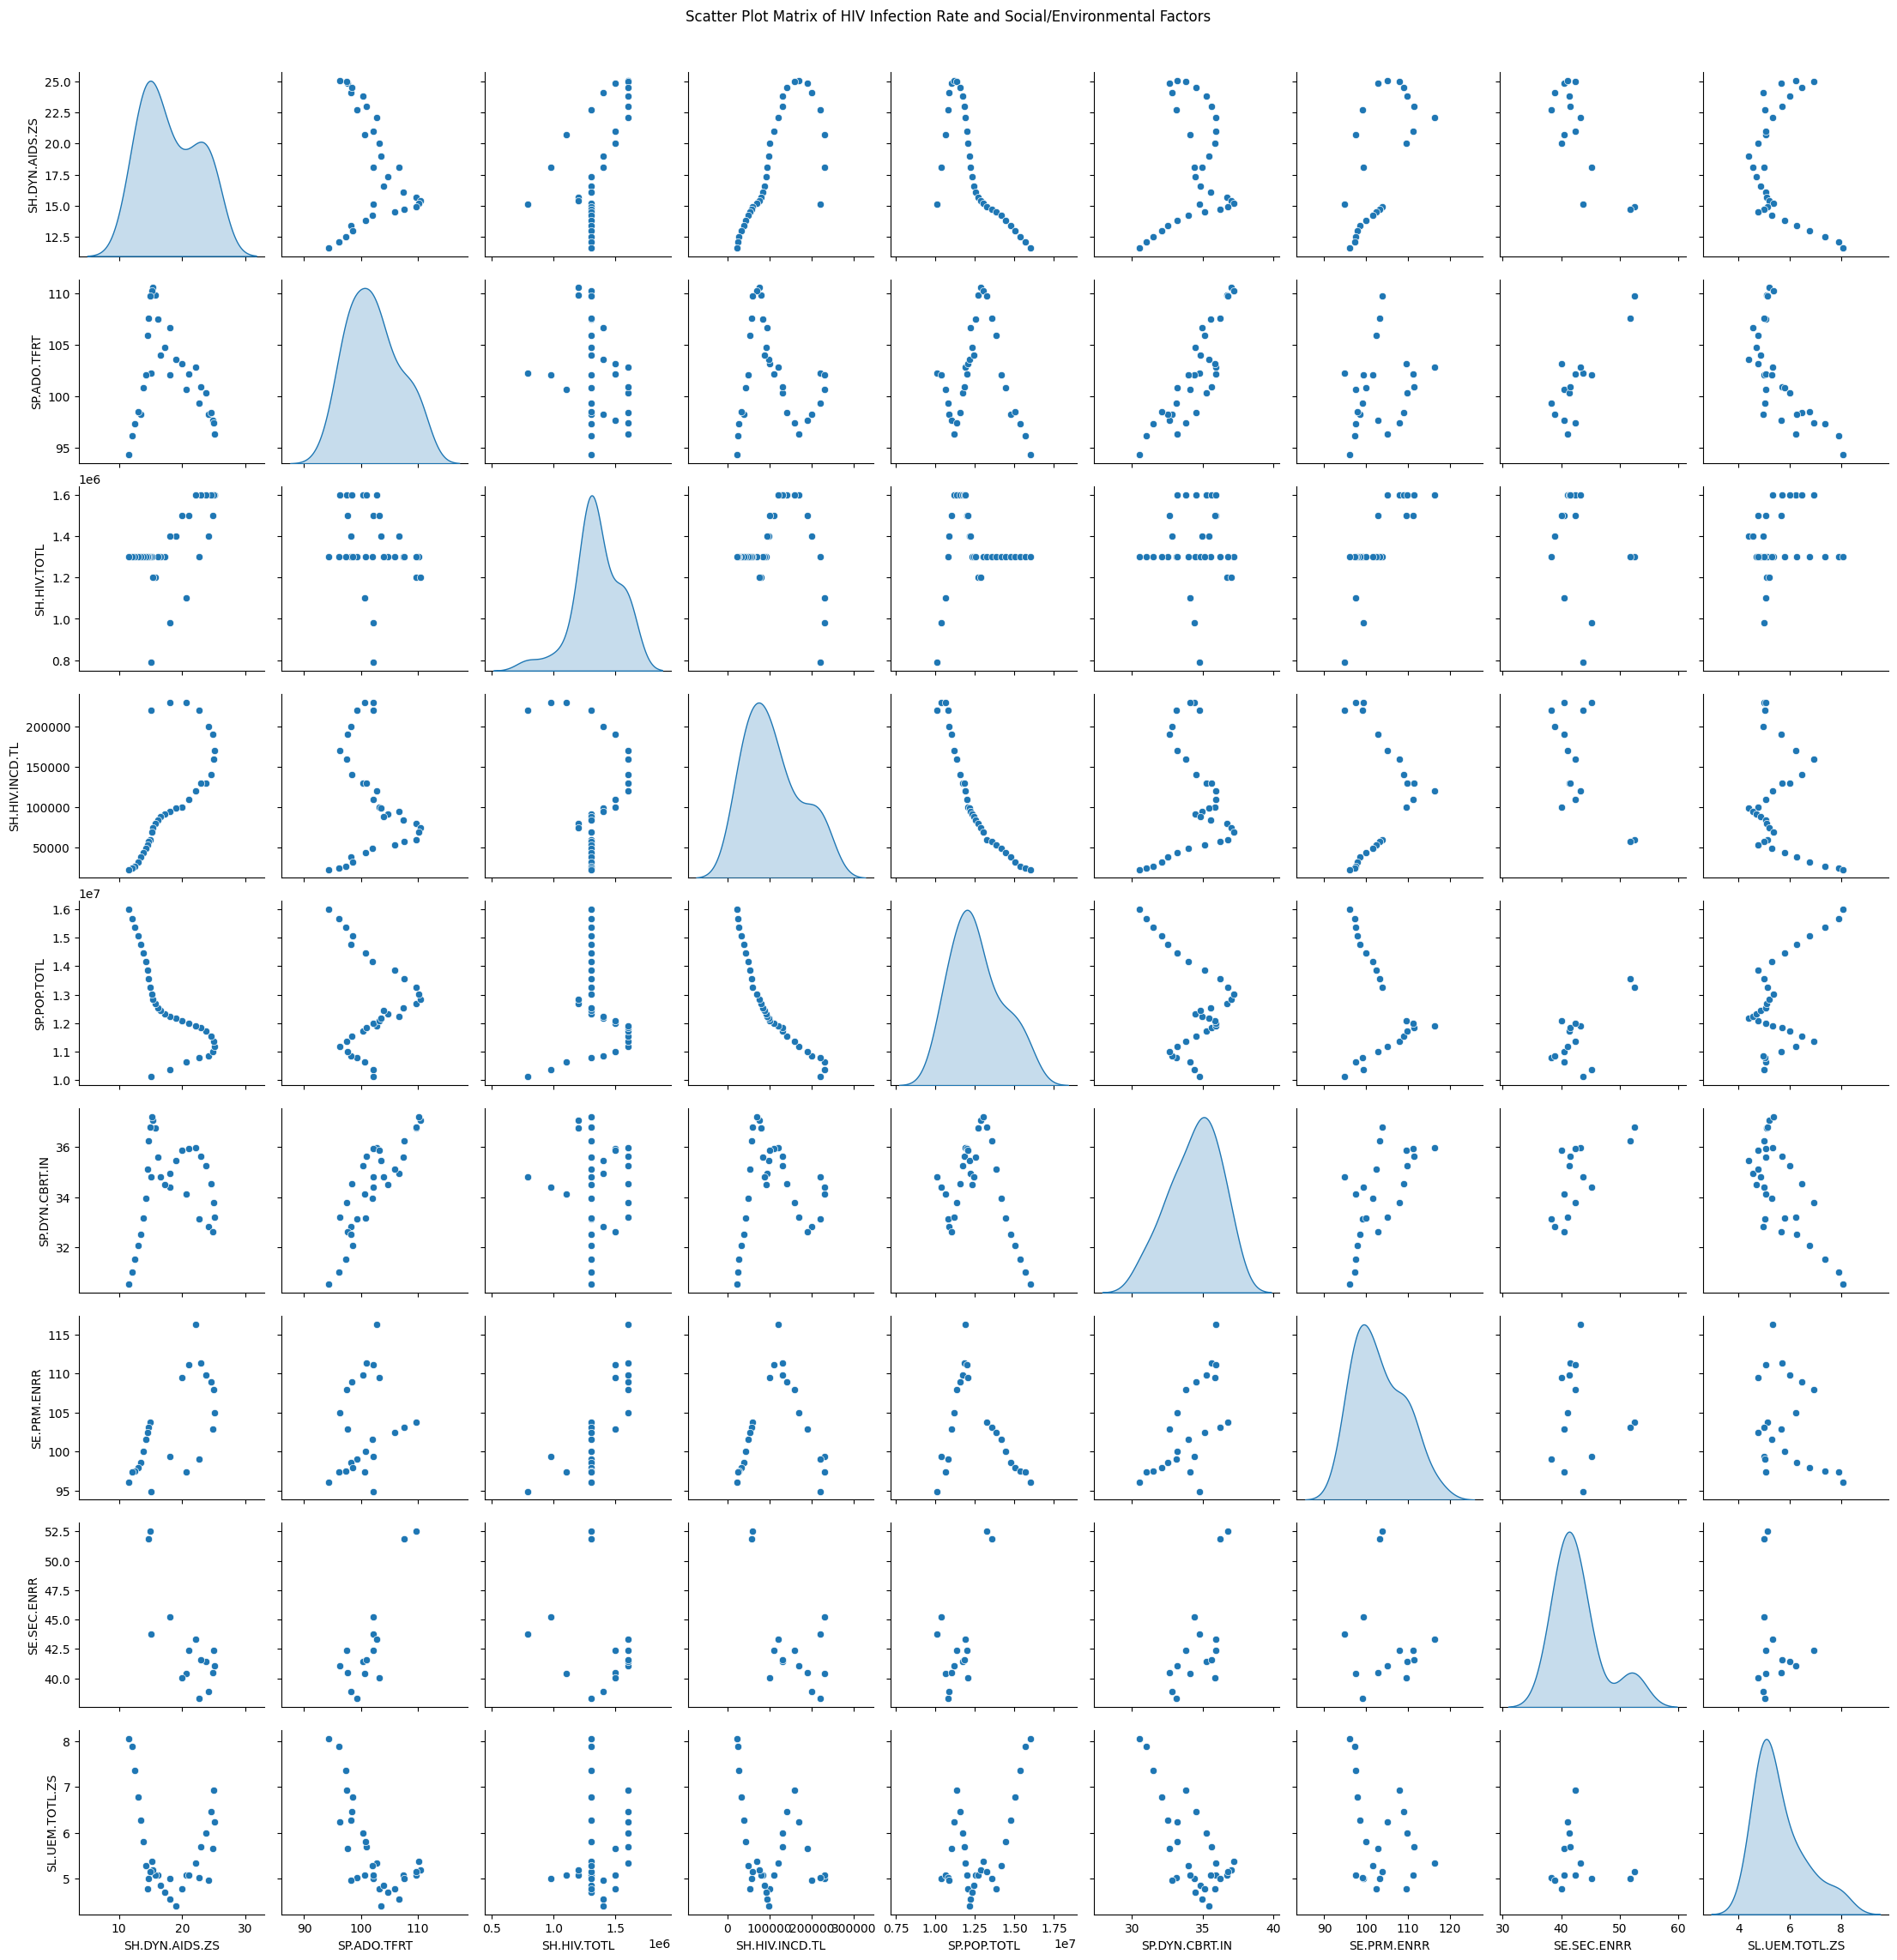

NameError: name 'pivo_data' is not defined

In [21]:
# Step 5: Develop visualizations
# Scatter plot matrix to visualize relationships
sns.pairplot(pivot_data, vars=[hiv_indicator] + socio_economic_factors, diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of HIV Infection Rate and Social/Environmental Factors', y=1.02)
plt.show()


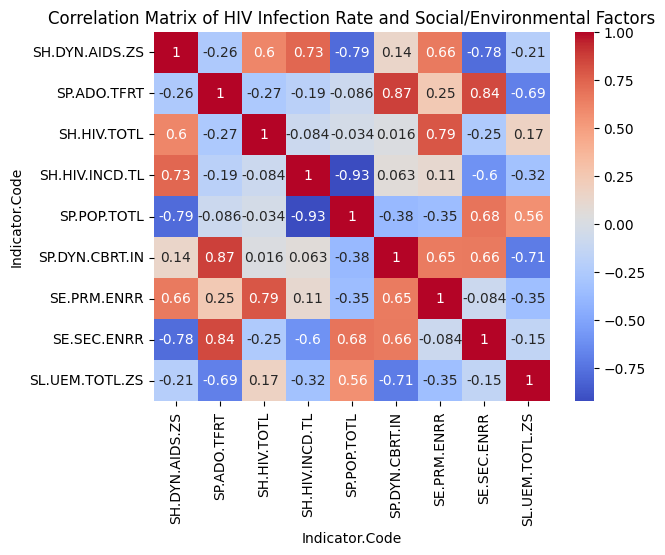

In [22]:
# Heatmap of correlation matrix
correlation_matrix = pivot_data[[hiv_indicator] + socio_economic_factors].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of HIV Infection Rate and Social/Environmental Factors')
plt.show()